In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load your data
df = pd.read_excel('Preprocessed_data_2.xlsx')

In [55]:

# Basic Overview
print("Basic Info of Dataset:")
df.info()  # Provides data types and non-null counts

print("\nFirst 5 Rows of the Dataset:")
print(df.head())  # Displays first 5 rows for context

# Summary Statistics for Numeric Columns
print("\nSummary Statistics (Numeric Data):")
print(df.describe())  # Mean, min, max, std, percentiles for numeric columns

# Unique Values in Categorical Columns
print("\nUnique Values in Categorical Data:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"Column '{column}': {df[column].unique()}")

# Value Counts for Key Columns
print("\nValue Counts for Key Columns:")
key_columns = ['Family_Structure', 'Gender', 'Occupation', 'Preferred_Store', 'Payment_Mode']
for column in key_columns:
    print(f"\nColumn '{column}':\n{df[column].value_counts()}")

# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Shape of the Dataset
print("\nShape of the Dataset:")
print(df.shape)  # Rows and columns count

Basic Info of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Family_Structure                235 non-null    object
 1   Age                             235 non-null    int64 
 2   Gender                          235 non-null    object
 3   Occupation                      235 non-null    object
 4   Education                       235 non-null    object
 5   Income_Range                    235 non-null    object
 6   Primary_Shopper                 235 non-null    object
 7   Shopping_Companion              235 non-null    object
 8   Shopping_Frequency              235 non-null    object
 9   Shopping_Time                   235 non-null    object
 10  Preferred_Store                 235 non-null    object
 11  Factor_Proximity                235 non-null    int64 
 12  Factor_Pricing             

In [56]:
# Loop through each column and list its unique values
for col in df.columns:
    print(f"Column: {col}")
    unique_values = df[col].unique()
    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")

Column: Family_Structure
Unique Values (2): ['Nuclear family' 'Joint family']

Column: Age
Unique Values (48): [21 22 19 25 23 38 37 40 24 35 36 18 20 44 54 26 65 45 39 47 55 16 46 28
 33 17 68 43 34 62 50 56 32 31 30 53 59 51 42 15 48 60 52 27 49 57 58 29]

Column: Gender
Unique Values (2): ['Male' 'Female']

Column: Occupation
Unique Values (6): ['Student' 'Self-employed' 'Private sector employee' 'Homemaker'
 'Government employee' 'Retired']

Column: Education
Unique Values (4): ['Postgraduate' 'Graduate' 'No formal education' 'Secondary']

Column: Income_Range
Unique Values (7): ['‚Çπ75,000 - ‚Çπ99,999' '‚Çπ25,000 - ‚Çπ49,999' '‚Çπ1,25,000 - ‚Çπ1,49,999'
 '‚Çπ1,00,000 - ‚Çπ1,24,999' 'More than ‚Çπ1,50,000' 'Less than ‚Çπ25,000'
 '‚Çπ50,000 - ‚Çπ74,999']

Column: Primary_Shopper
Unique Values (4): ['Joint responsibility' 'Other family member' 'Self' 'Spouse/partner']

Column: Shopping_Companion
Unique Values (3): ['With family' 'Alone' 'With friends']

Column: Shopping_Frequency
Uni

In [57]:
df.shape

(235, 61)

In [58]:
df.sample(5)

Family_Structure  Age  Gender           Occupation     Education  \
48      Joint family   22  Female              Student  Postgraduate   
2       Joint family   22    Male              Student  Postgraduate   
196   Nuclear family   40  Female  Government employee      Graduate   
232   Nuclear family   20  Female              Student     Secondary   
203   Nuclear family   20  Female              Student      Graduate   

              Income_Range      Primary_Shopper Shopping_Companion  \
48   ‚Çπ1,25,000 - ‚Çπ1,49,999  Other family member        With family   
2    ‚Çπ1,25,000 - ‚Çπ1,49,999  Other family member              Alone   
196  ‚Çπ1,25,000 - ‚Çπ1,49,999                 Self        With family   
232      ‚Çπ50,000 - ‚Çπ74,999  Other family member        With family   
203      Less than ‚Çπ25,000                 Self        With family   

     Shopping_Frequency Shopping_Time Preferred_Store  Factor_Proximity  \
48         Once a month       Evening    Supermarkets                 5   
2    2-3 times per week       Morning    Supermarkets                 2   
196        Once a month       Evening    Supermarkets                 3   
232         Once a week       Morning    Supermarkets                 5   
203         Once a week     Afternoon    Supermarkets                 4   

     Factor_Pricing  Factor_Variety  Factor_Fresh_Produce  \
48                5               4                     5   
2                 2               2                     2   
196               3               3                     4   
232               5               4                     5   
203               3               2                     1   

     Factor_Store_Layout  Factor_Online_Options Product_Preferences  \
48                     4                      3        Kirana store   
2                      2                      2         Supermarket   
196                    4                      5       No preference   
232                    4                      1         Supermarket   
203                    2                      1        Kirana store   

       Brand_Importance    Bulk_or_Need Quantity_Per_Trip  \
48              Neutral  Bulk purchases          5-9.9 kg   
2    Somewhat important       As needed          2-4.9 kg   
196  Somewhat important  Bulk purchases   More than 20 kg   
232      Very important  Bulk purchases          5-9.9 kg   
203  Somewhat important  Bulk purchases          2-4.9 kg   

        Time_Spent_Per_Visit  Spend_Per_Visit  Monthly_Spend  \
48         More than 2 hours             7000           7000   
2    15 minutes - 45 minutes             3000          15000   
196            1.5 - 2 hours             9000           7000   
232            1.5 - 2 hours             5000           7000   
203     Less than 15 minutes              100           7000   

          Payment_Mode   Discount_Awareness Discount_Usage Discount_Value  \
48                 UPI  In-store promotions   Occasionally            Yes   
2                 Cash  In-store promotions   Occasionally             No   
196  Debit/Credit card    None of the above         Rarely       Not sure   
232                UPI           Online ads     Frequently            Yes   
203               Cash            Newspaper   Occasionally             No   

     Discount_Influence  Loyalty_Score Online_Shopping_Frequency  \
48        Yes, slightly              4                    Rarely   
2         Yes, slightly              4              Occasionally   
196       No difference              3                Frequently   
232       Yes, slightly              4                     Never   
203  Yes, significantly              1              Occasionally   

    Cart_Abandonment_Reasons  Store_Quality_Rating  Store_Pricing_Rating  \
48                 ['Never']                     4                     4   
2    ['Long delivery times']                     3                     4   
196                ['Never']       

In [59]:
df.columns

Index(['Family_Structure', 'Age', 'Gender', 'Occupation', 'Education',
       'Income_Range', 'Primary_Shopper', 'Shopping_Companion',
       'Shopping_Frequency', 'Shopping_Time', 'Preferred_Store',
       'Factor_Proximity', 'Factor_Pricing', 'Factor_Variety',
       'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options',
       'Product_Preferences', 'Brand_Importance', 'Bulk_or_Need',
       'Quantity_Per_Trip', 'Time_Spent_Per_Visit', 'Spend_Per_Visit',
       'Monthly_Spend', 'Payment_Mode', 'Discount_Awareness', 'Discount_Usage',
       'Discount_Value', 'Discount_Influence', 'Loyalty_Score',
       'Online_Shopping_Frequency', 'Cart_Abandonment_Reasons',
       'Store_Quality_Rating', 'Store_Pricing_Rating',
       'Recommendation_Likelihood', 'Sustainability_Importance',
       'Eco_Friendly_Actions', 'Store_Sustainability_Efforts', 'BigBasket',
       'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart', 'Amazon Fresh',
       'Flipkart', 'D-Mart', 'Other_Online_

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Function to summarize DataFrame and display in table format
def summarize_dataframe(df):
    summary = {
        'Column Name': [],
        'Data Type': [],
        'Unique Values': []
    }
    
    for col in df.columns:
        summary['Column Name'].append(col)
        summary['Data Type'].append(df[col].dtype)
        unique_values = df[col].unique()
        if len(unique_values) > 20:  # Limiting the display of unique values to 20 for readability
            summary['Unique Values'].append(unique_values[:20])
        else:
            summary['Unique Values'].append(unique_values)
    
    summary_df = pd.DataFrame(summary)
    return summary_df

# Summarize the DataFrame
summary_df = summarize_dataframe(df)
print(tabulate(summary_df, headers='keys', tablefmt='pipe'))


|    | Column Name                    | Data Type   | Unique Values                                                            |
|---:|:-------------------------------|:------------|:-------------------------------------------------------------------------|
|  0 | Family_Structure               | object      | ['Nuclear family' 'Joint family']                                        |
|  1 | Age                            | int64       | [21 22 19 25 23 38 37 40 24 35 36 18 20 44 54 26 65 45 39 47]            |
|  2 | Gender                         | object      | ['Male' 'Female']                                                        |
|  3 | Occupation                     | object      | ['Student' 'Self-employed' 'Private sector employee' 'Homemaker'         |
|    |                                |             |  'Government employee' 'Retired']                                        |
|  4 | Education                      | object      | ['Postgraduate' 'Graduate' 'No formal educa

## Demography

Overall Age Stats:
 count    235.000000
mean      31.629787
std       13.548077
min       15.000000
25%       22.000000
50%       24.000000
75%       41.000000
max       68.000000
Name: Age, dtype: float64

Age Stats by Gender:
         count       mean        std   min   25%   50%    75%   max
Gender                                                            
Female  128.0  29.562500  11.957108  15.0  21.0  23.0  37.25  59.0
Male    107.0  34.102804  14.918606  16.0  22.0  25.0  46.50  68.0


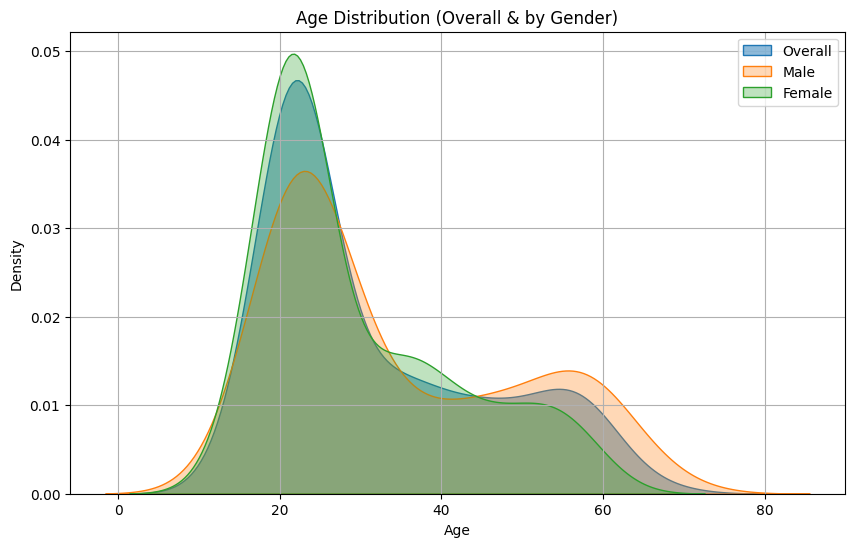

In [61]:
# Descriptive statistics for Age (overall)
overall_stats = df['Age'].describe()

# Descriptive statistics for Age by Gender
gender_stats = df.groupby('Gender')['Age'].describe()

print("Overall Age Stats:\n", overall_stats)
print("\nAge Stats by Gender:\n", gender_stats)

# KDE plot for Age distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", label="Overall", fill=True, alpha=0.5)
sns.kdeplot(data=df[df['Gender'] == 'Male'], x="Age", label="Male", fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Gender'] == 'Female'], x="Age", label="Female", fill=True, alpha=0.3)
plt.title("Age Distribution (Overall & by Gender)")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid()
plt.show()

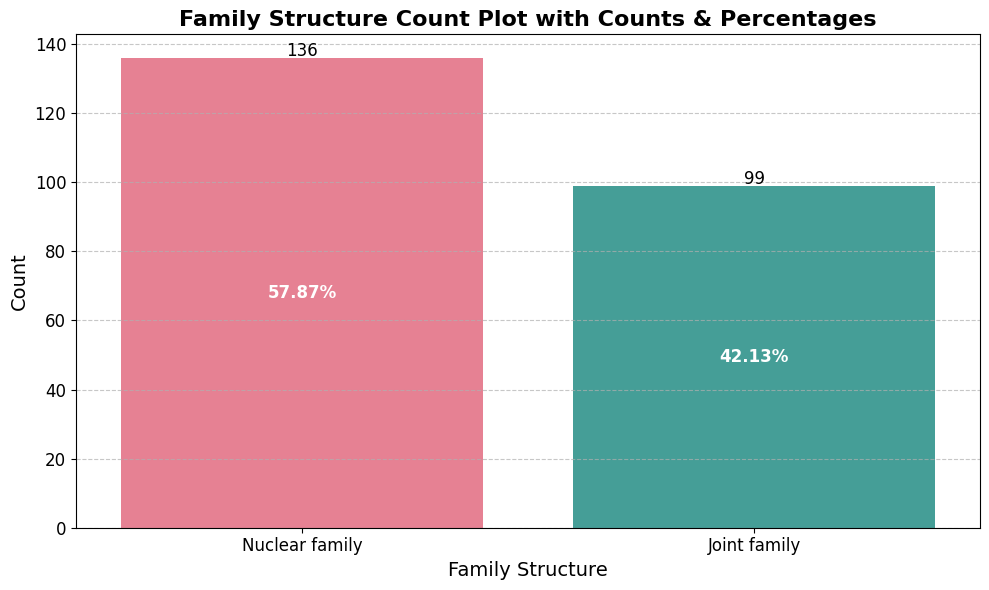

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate counts and percentages
family_counts = df['Family_Structure'].value_counts()
total = len(df['Family_Structure'])
percentages = (family_counts / total * 100).round(2)

# Create count plot with enhanced visuals
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(family_counts))  # Use diverse color palette
ax = sns.countplot(data=df, x='Family_Structure', order=family_counts.index, palette=colors)

# Add annotations
for bar, (count, percentage) in zip(ax.patches, zip(family_counts, percentages)):
    # Add percentage inside the bar
    ax.annotate(f'{percentage}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),  # Center inside the bar
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    # Add count on top of the bar
    ax.annotate(f'{count}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),  # Slightly above the bar
                ha='center', va='baseline', fontsize=12, color='black')

# Customize plot
plt.title("Family Structure Count Plot with Counts & Percentages", fontsize=16, fontweight='bold')
plt.xlabel("Family Structure", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [63]:
import pandas as pd

# Cross-tabulation for counts
cross_tab_counts = pd.crosstab(df['Occupation'], df['Education'])

# Cross-tabulation for percentages (row-wise)
cross_tab_percentages = pd.crosstab(df['Occupation'], df['Education'], normalize='index') * 100

# Combine counts and percentages into a single DataFrame for better reporting
cross_tab_report = cross_tab_counts.astype(str) + " (" + cross_tab_percentages.round(2).astype(str) + "%)"

# Highlight by shading the percentage table
def highlight_high_to_low(val):
    color = f'rgba(0, 0, 255, {val/100})'  # Transparency based on percentage
    return f'background-color: {color};' if val > 0 else ''

# Apply shading for percentage table
styled_report = cross_tab_percentages.style.background_gradient(cmap="Blues").format("{:.2f}%")

# Display counts, percentages, and styled table
print("Cross Tab Report:\n")
print(cross_tab_report)  # Combined counts and percentages
print("\nStyling applied to percentage shading:\n")
styled_report  # This will display nicely in Jupyter or similar tools

Cross Tab Report:

Education                   Graduate No formal education Postgraduate  \
Occupation                                                              
Government employee      35 (74.47%)            0 (0.0%)   6 (12.77%)   
Homemaker                 4 (33.33%)           1 (8.33%)   2 (16.67%)   
Private sector employee   38 (62.3%)            0 (0.0%)  20 (32.79%)   
Retired                    3 (60.0%)            0 (0.0%)    1 (20.0%)   
Self-employed             6 (46.15%)            0 (0.0%)   6 (46.15%)   
Student                  46 (47.42%)           1 (1.03%)  34 (35.05%)   

Education                  Secondary  
Occupation                            
Government employee       6 (12.77%)  
Homemaker                 5 (41.67%)  
Private sector employee    3 (4.92%)  
Retired                    1 (20.0%)  
Self-employed              1 (7.69%)  
Student                  16 (16.49%)  

Styling applied to percentage shading:



In [64]:
import pandas as pd

# Cross-tabulation for counts
cross_tab_counts = pd.crosstab(df['Occupation'], df['Education'])

# Cross-tabulation for percentages (row-wise)
cross_tab_percentages = pd.crosstab(df['Occupation'], df['Education'], normalize='index') * 100

# Combine counts and percentages into a single DataFrame
cross_tab_report = cross_tab_counts.astype(str) + " (" + cross_tab_percentages.round(2).astype(str) + "%)"

# Styling without highlighting
styled_report = cross_tab_report.style.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-size', '14px')]
}]).set_properties(**{
    'text-align': 'center',
    'font-size': '12px',
    'border': '1px solid black',
    'background-color': '#f9f9f9',
    'color': '#333',
})

# Display the styled report
print("Cross Tab Report without Highlighting:\n")
styled_report

Cross Tab Report without Highlighting:



In [65]:
import pandas as pd

# Calculate counts and percentages for Education
education_counts = df['Education'].value_counts()
education_percentages = (education_counts / len(df['Education']) * 100).round(2)

# Combine Education counts and percentages into a DataFrame and sort in descending order
education_summary = pd.DataFrame({
    'Count': education_counts,
    'Percentage': education_percentages
}).sort_values(by='Count', ascending=False)

# Calculate counts and percentages for Occupation
occupation_counts = df['Occupation'].value_counts()
occupation_percentages = (occupation_counts / len(df['Occupation']) * 100).round(2)

# Combine Occupation counts and percentages into a DataFrame and sort in descending order
occupation_summary = pd.DataFrame({
    'Count': occupation_counts,
    'Percentage': occupation_percentages
}).sort_values(by='Count', ascending=False)

# Apply color shading to highlight counts from high to low
education_summary_styled = education_summary.style.background_gradient(cmap="Greens")
occupation_summary_styled = occupation_summary.style.background_gradient(cmap="Purples")

# Display the styled tables
print("Education Summary:\n")
display(education_summary_styled)

print("\nOccupation Summary:\n")
display(occupation_summary_styled)

Education Summary:




Occupation Summary:



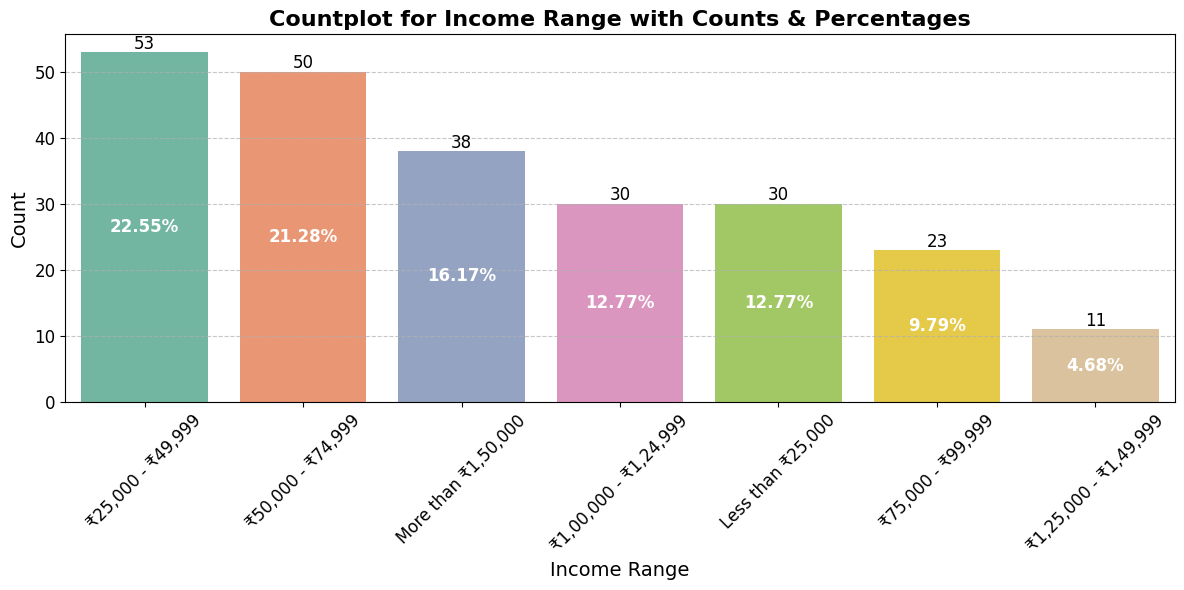

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Income Range with Percentages and Counts
plt.figure(figsize=(12, 6))
income_counts = df['Income_Range'].value_counts()
total = len(df['Income_Range'])
percentages = (income_counts / total * 100).round(2)

# Create countplot
ax = sns.countplot(data=df, x='Income_Range', order=income_counts.index, palette="Set2")

# Add annotations (percentage inside the bar and count on top of the bar)
for bar, (count, percentage) in zip(ax.patches, zip(income_counts, percentages)):
    # Add percentage inside the bar
    ax.annotate(f'{percentage}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),  # Center inside the bar
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    # Add count on top of the bar
    ax.annotate(f'{count}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),  # Slightly above the bar
                ha='center', va='baseline', fontsize=12, color='black')

# Customize the plot
plt.title("Countplot for Income Range with Counts & Percentages", fontsize=16, fontweight='bold')
plt.xlabel("Income Range", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

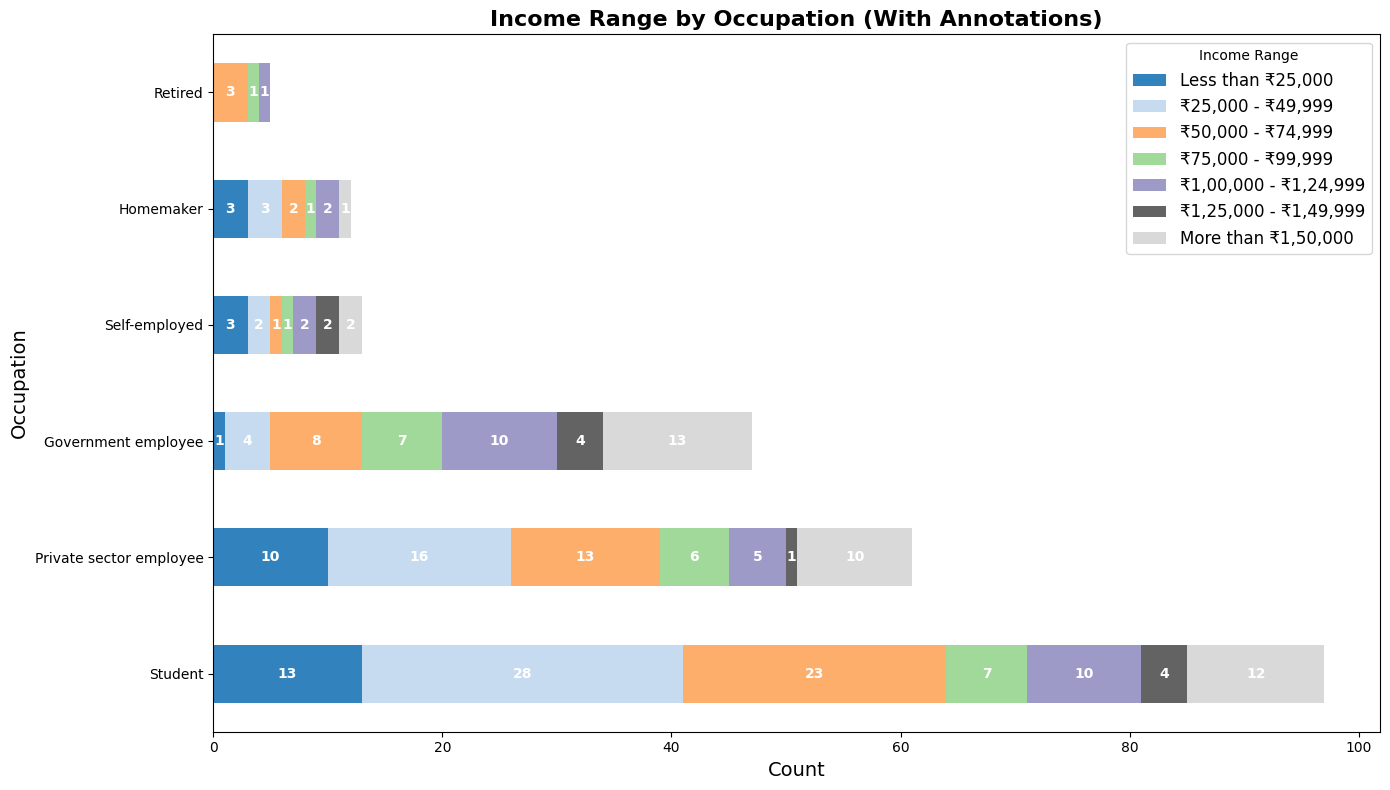

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the explicit order for Income Range
income_order = [
    'Less than ‚Çπ25,000', 
    '‚Çπ25,000 - ‚Çπ49,999', 
    '‚Çπ50,000 - ‚Çπ74,999', 
    '‚Çπ75,000 - ‚Çπ99,999', 
    '‚Çπ1,00,000 - ‚Çπ1,24,999', 
    '‚Çπ1,25,000 - ‚Çπ1,49,999', 
    'More than ‚Çπ1,50,000'
]

# Count values for Income Range by Occupation
occupation_income_counts = pd.crosstab(df['Occupation'], df['Income_Range']).reindex(columns=income_order)

# Sort occupations based on total count (sum across all income ranges) in descending order
sorted_occupations = occupation_income_counts.sum(axis=1).sort_values(ascending=False).index

# Create horizontal bar chart
plt.figure(figsize=(14, 8))
ax = occupation_income_counts.loc[sorted_occupations].plot(
    kind='barh', stacked=True, figsize=(14, 8), colormap='tab20c'
)

# Add annotations (count inside each bar)
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_width() > 0:  # Annotate only if the bar has a positive width
            ax.annotate(f'{int(bar.get_width())}', 
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                        ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Customize the plot
plt.title("Income Range by Occupation (With Annotations)", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Occupation", fontsize=14)
plt.legend(title="Income Range", fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

## Shoppping Behaviour 

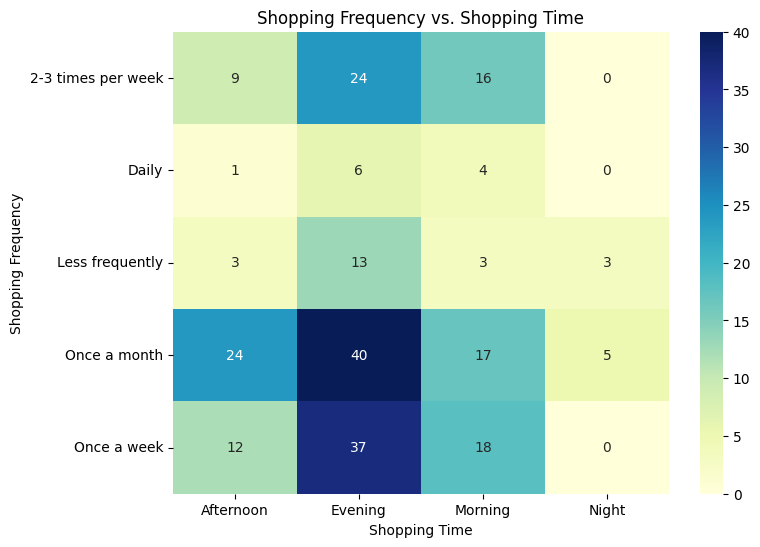

In [68]:
# Create a pivot table for Shopping Frequency and Shopping Time
heatmap_data = df.pivot_table(index='Shopping_Frequency', columns='Shopping_Time', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Shopping Frequency vs. Shopping Time")
plt.xlabel("Shopping Time")
plt.ylabel("Shopping Frequency")
plt.show()

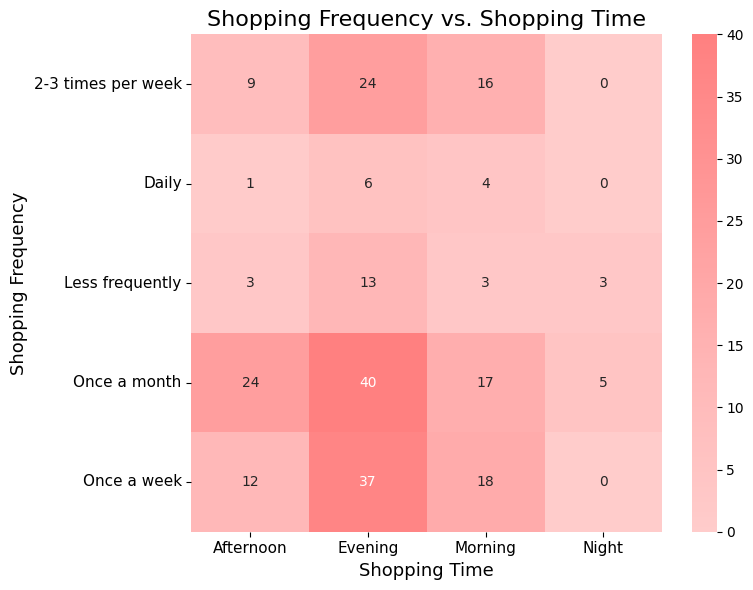

In [69]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom peach colormap
colors = ["#FFCCCB", "#FFB6B6", "#FF9999", "#FF8080"]  # Custom peach shades
peach_cmap = LinearSegmentedColormap.from_list("PeachCmap", colors, N=100)

# Create a pivot table for Shopping Frequency and Shopping Time
heatmap_data = df.pivot_table(index='Shopping_Frequency', columns='Shopping_Time', aggfunc='size', fill_value=0)

# Plot heatmap with custom peach colormap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap=peach_cmap)
plt.title("Shopping Frequency vs. Shopping Time", fontsize=16)
plt.xlabel("Shopping Time", fontsize=13)
plt.ylabel("Shopping Frequency", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

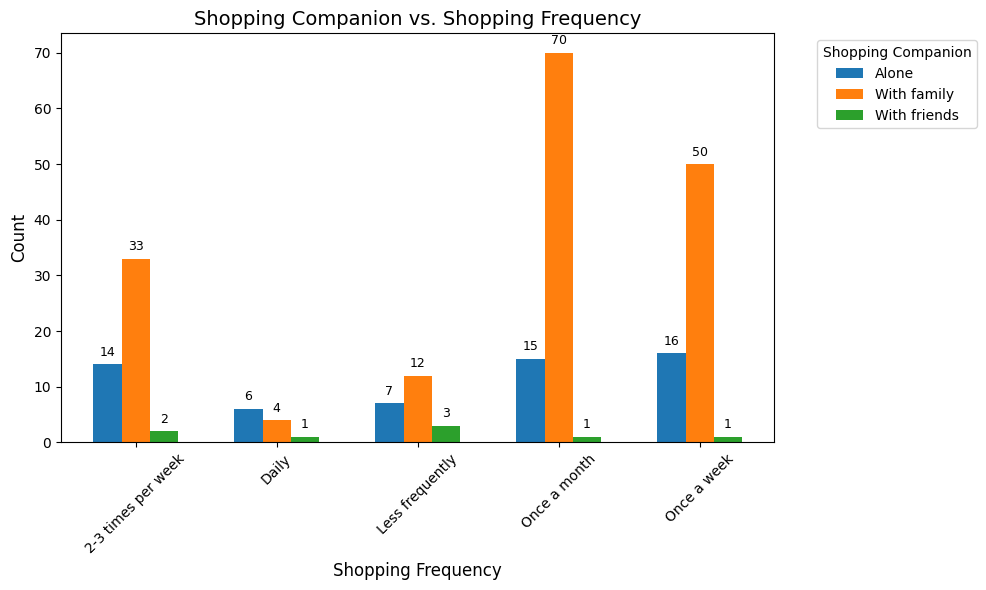

In [70]:
# Replace 'df' with your actual DataFrame
# Step 1: Group the data
companion_frequency = df.groupby(['Shopping_Frequency', 'Shopping_Companion']).size().reset_index(name='Count')

# Step 2: Pivot for grouped bar chart
pivot_data = companion_frequency.pivot(index='Shopping_Frequency', columns='Shopping_Companion', values='Count').fillna(0)

# Step 3: Plot the grouped bar chart
categories = pivot_data.index  # Shopping_Frequency categories
companion_types = pivot_data.columns  # Shopping_Companion types
x = np.arange(len(categories))  # Numeric positions for bars
width = 0.2  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each companion type
bars = []
for i, companion in enumerate(companion_types):
    bars.append(ax.bar(x + i * width, pivot_data[companion], width, label=companion))

# Add annotations (counts on top of bars)
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}", ha='center', va='bottom', fontsize=9)

# Customize the chart
ax.set_title('Shopping Companion vs. Shopping Frequency', fontsize=14)
ax.set_xlabel('Shopping Frequency', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x + width * (len(companion_types) - 1) / 2)
ax.set_xticklabels(categories, rotation=45)
ax.legend(title='Shopping Companion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

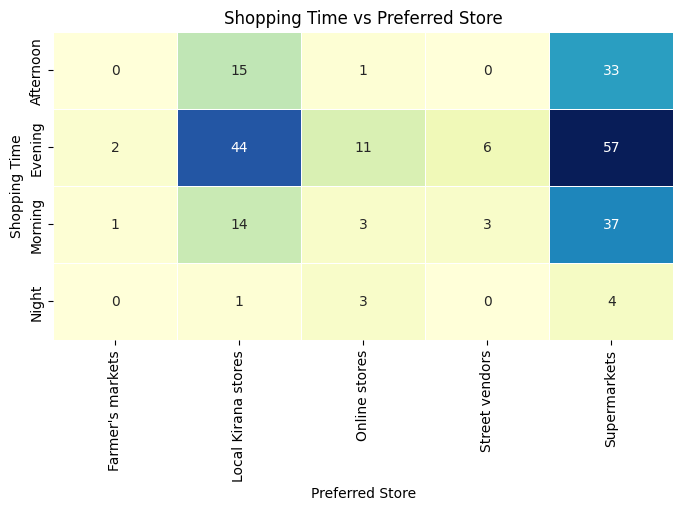

In [71]:
# Group data by Shopping Time and Preferred Store
table_data = df.groupby(['Shopping_Time', 'Preferred_Store']).size().unstack(fill_value=0)

# Plotting the table as a heatmap
plt.figure(figsize=(8,4))
sns.heatmap(table_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, cbar=False)
plt.title("Shopping Time vs Preferred Store")
plt.xlabel("Preferred Store")
plt.ylabel("Shopping Time")
plt.show()

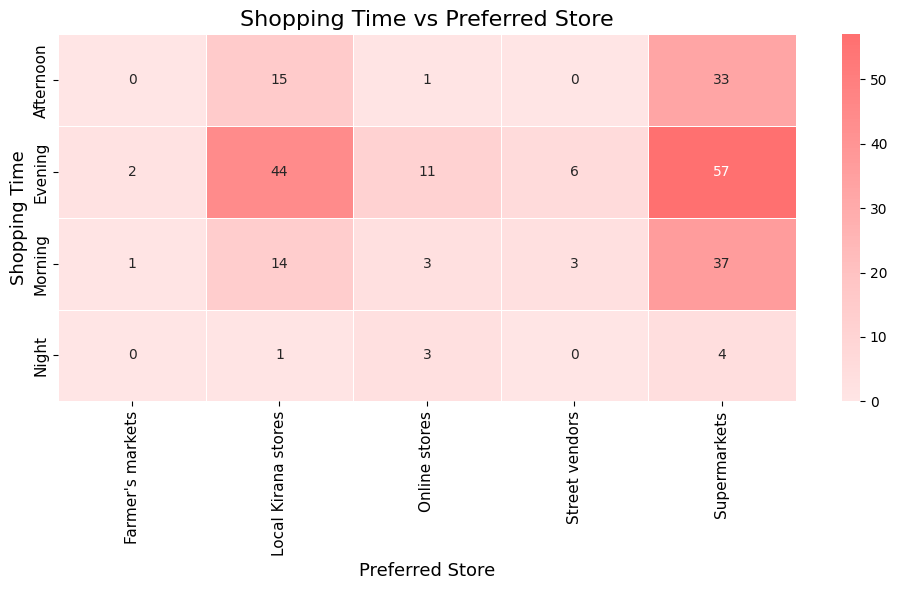

In [72]:
from matplotlib.colors import LinearSegmentedColormap

# Create a custom peach colormap
colors = ["#FFE5E5", "#FFC4C4", "#FF9999", "#FF7070"]  # Lighter to darker peach shades
peach_cmap = LinearSegmentedColormap.from_list("PeachCmap", colors, N=100)

# Group data by Shopping Time and Preferred Store
table_data = df.groupby(['Shopping_Time', 'Preferred_Store']).size().unstack(fill_value=0)

# Plotting the table as a heatmap with peach colors
plt.figure(figsize=(10, 6))  # Adjust figure size for better clarity
sns.heatmap(
    table_data,
    annot=True,
    fmt="d",
    cmap=peach_cmap,  # Apply custom peach colormap
    linewidths=0.5,   # Add gridlines between cells
    cbar=True         # Include a color scale (colorbar)
)
plt.title("Shopping Time vs Preferred Store", fontsize=16)
plt.xlabel("Preferred Store", fontsize=13)
plt.ylabel("Shopping Time", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Shopping Factors

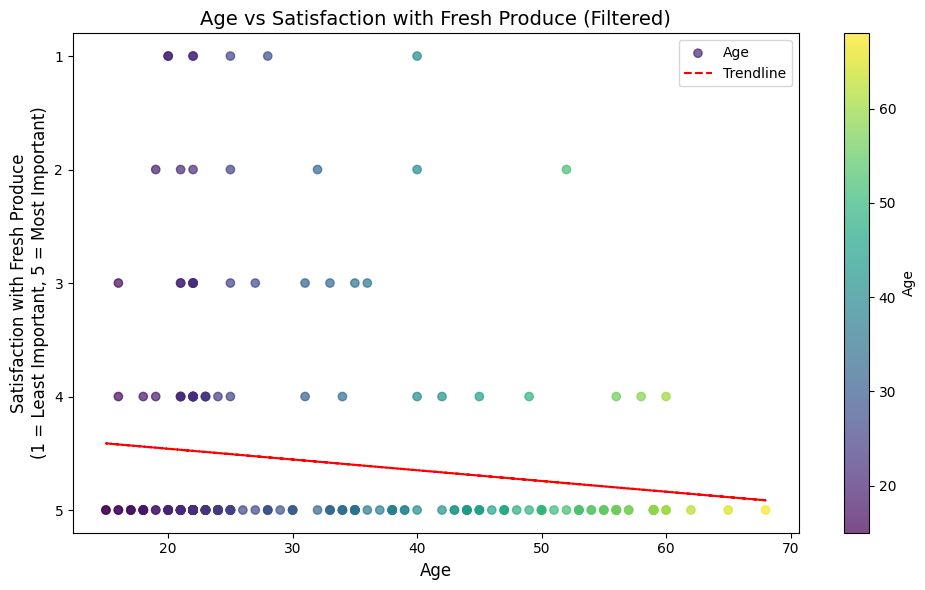

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include satisfaction scores between 1 and 5 only
filtered_df = df[(df['Factor_Fresh_Produce'] >= 1) & (df['Factor_Fresh_Produce'] <= 5)]

# Scatter plot for Age vs. Satisfaction (Filtered)
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age'], filtered_df['Factor_Fresh_Produce'], alpha=0.7, c=filtered_df['Age'], cmap='viridis', label='Age')

# Add a trendline
z = np.polyfit(filtered_df['Age'], filtered_df['Factor_Fresh_Produce'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['Age'], p(filtered_df['Age']), color='red', linestyle='--', label='Trendline')

# Customize the chart
plt.title('Age vs Satisfaction with Fresh Produce (Filtered)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Satisfaction with Fresh Produce\n(1 = Least Important, 5 = Most Important)', fontsize=12)
plt.yticks([5, 4, 3, 2, 1])  # Flip y-axis ticks to show descending order
plt.gca().invert_yaxis()  # Invert the y-axis
plt.colorbar(label='Age')
plt.legend()
plt.tight_layout()
plt.show()

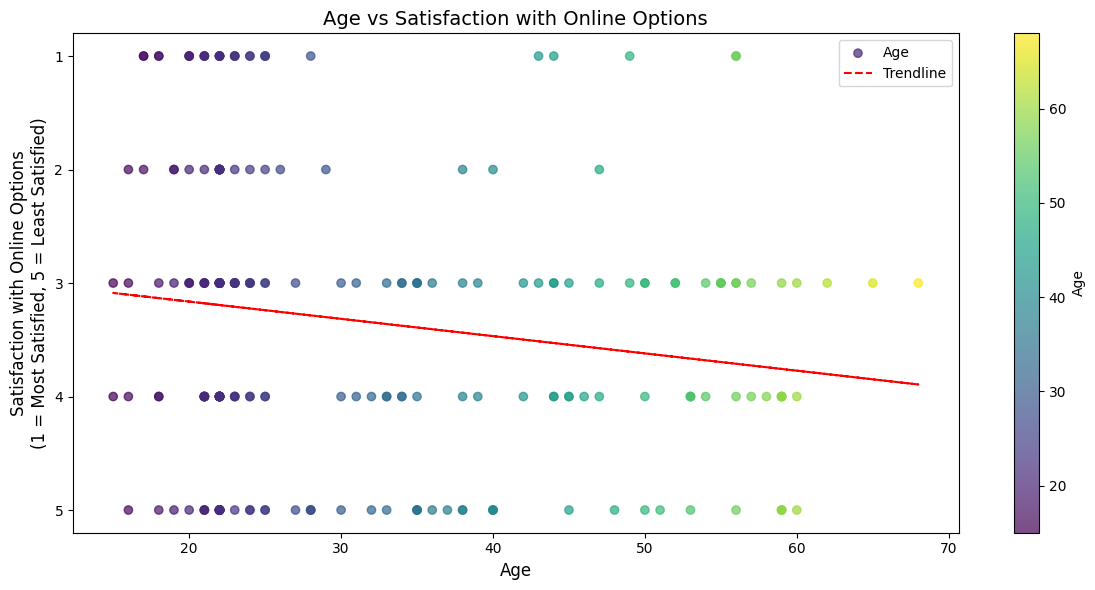

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include Satisfaction scores between 1 and 5 only
filtered_df = df[(df['Factor_Online_Options'] >= 1) & (df['Factor_Online_Options'] <= 5)]

# Scatter plot for Age vs. Satisfaction with Online Options
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['Age'], filtered_df['Factor_Online_Options'], alpha=0.7, c=filtered_df['Age'], cmap='viridis', label='Age')

# Add a trendline
z = np.polyfit(filtered_df['Age'], filtered_df['Factor_Online_Options'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['Age'], p(filtered_df['Age']), color='red', linestyle='--', label='Trendline')

# Customize the chart
plt.title('Age vs Satisfaction with Online Options', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Satisfaction with Online Options\n(1 = Most Satisfied, 5 = Least Satisfied)', fontsize=12)
plt.yticks([5, 4, 3, 2, 1])  # Flip y-axis to descending order
plt.gca().invert_yaxis()  # Invert y-axis so 1 is at the bottom
plt.colorbar(label='Age')
plt.legend()
plt.tight_layout()
plt.show()

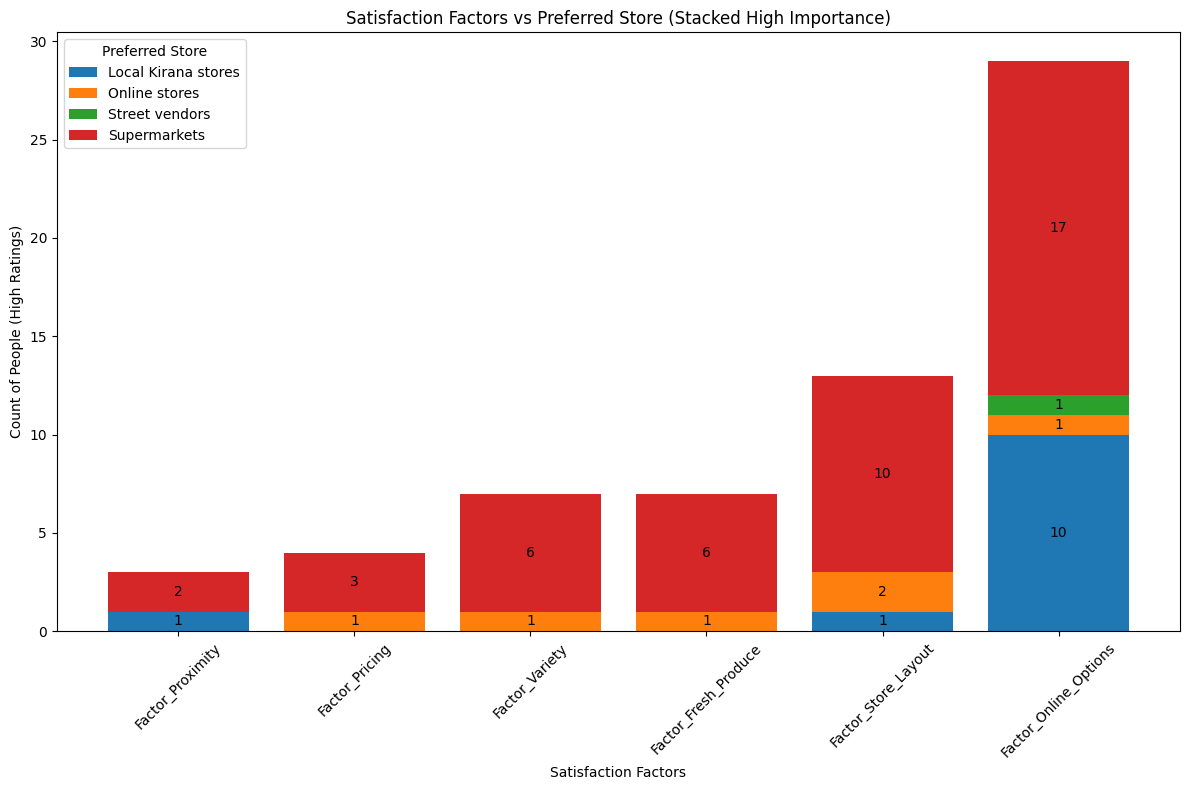

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your actual dataframe
# Filter rows where satisfaction factors are rated as "most important" (rating = 1)
filtered_data = df.loc[
    (df['Factor_Proximity'] == 1) |
    (df['Factor_Pricing'] == 1) |
    (df['Factor_Variety'] == 1) |
    (df['Factor_Fresh_Produce'] == 1) |
    (df['Factor_Store_Layout'] == 1) |
    (df['Factor_Online_Options'] == 1)
]

# Group by Preferred_Store and count occurrences of high ratings
grouped_data = filtered_data.groupby('Preferred_Store')[[
    'Factor_Proximity', 'Factor_Pricing', 'Factor_Variety',
    'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options'
]].apply(lambda x: (x == 1).sum()).transpose()

# Plotting stacked bar chart
def plot_stacked_bar_chart(grouped_data, factors):
    # Increase figure size
    plt.figure(figsize=(12, 8))
    
    x_indexes = range(len(factors))
    bottom = [0] * len(factors)

    # Create stacked bars with annotations
    for store in grouped_data.columns:
        bars = plt.bar(x_indexes, grouped_data[store], bottom=bottom, label=store)
        bottom = [bottom[i] + grouped_data[store][i] for i in range(len(factors))]
        
        # Add annotations on each bar
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(
                    bar.get_x() + bar.get_width() / 2.0, bar.get_y() + height / 2.0,
                    str(int(height)), ha='center', va='center', fontsize=10, color='black'
                )

    # Customize chart
    plt.xlabel('Satisfaction Factors')
    plt.ylabel('Count of People (High Ratings)')
    plt.title('Satisfaction Factors vs Preferred Store (Stacked High Importance)')
    plt.xticks(x_indexes, factors, rotation=45)
    plt.legend(title='Preferred Store')
    plt.tight_layout()

    # Show plot
    plt.show()

# Define the satisfaction factors for the X-axis
satisfaction_factors = ['Factor_Proximity', 'Factor_Pricing', 'Factor_Variety',
                        'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options']

# Generate the stacked bar chart with annotations
plot_stacked_bar_chart(grouped_data, satisfaction_factors)

## Product and Brannd Preference 

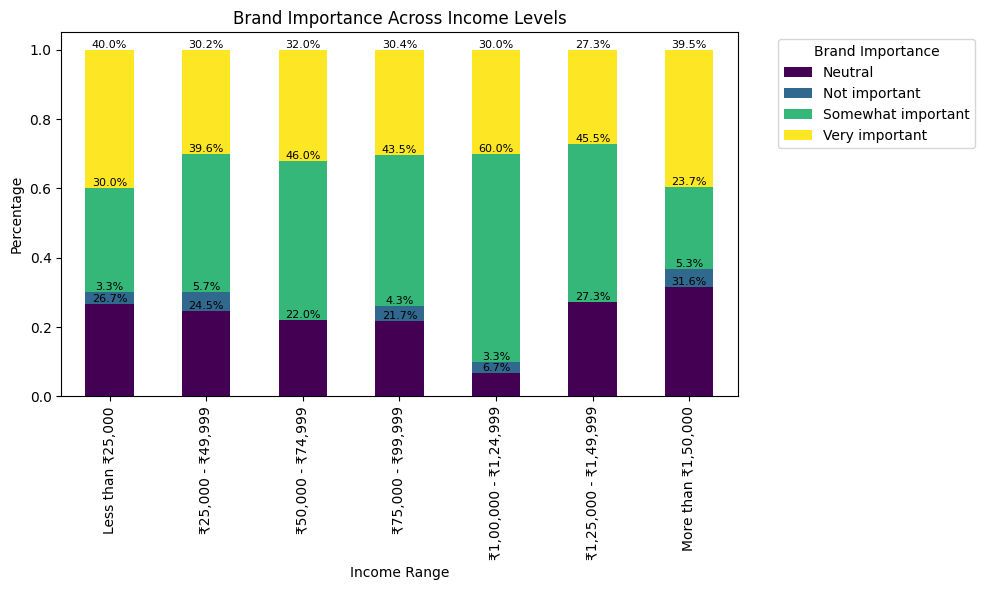

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into 'df'
income_vs_brand = df.groupby(['Income_Range', 'Brand_Importance']).size().unstack()

# Normalize to percentages (optional)
income_vs_brand = income_vs_brand.div(income_vs_brand.sum(axis=1), axis=0)

# Sort Income_Range in ascending order based on logical income levels
income_order = [
    'Less than ‚Çπ25,000',
    '‚Çπ25,000 - ‚Çπ49,999',
    '‚Çπ50,000 - ‚Çπ74,999',
    '‚Çπ75,000 - ‚Çπ99,999',
    '‚Çπ1,00,000 - ‚Çπ1,24,999',
    '‚Çπ1,25,000 - ‚Çπ1,49,999',
    'More than ‚Çπ1,50,000'
]
income_vs_brand = income_vs_brand.reindex(income_order)

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
income_vs_brand.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

# Add annotations to the bars
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() + bar.get_y()
    value = f'{bar.get_height() * 100:.1f}%'  # Convert to percentage format
    if bar.get_height() > 0:  # Annotate only visible bars
        ax.text(x, y, value, ha='center', va='bottom', fontsize=8, color='black')

# Customize plot
plt.title('Brand Importance Across Income Levels')
plt.ylabel('Percentage')
plt.xlabel('Income Range')

# Move legend to the top-right corner outside the chart
plt.legend(title='Brand Importance', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

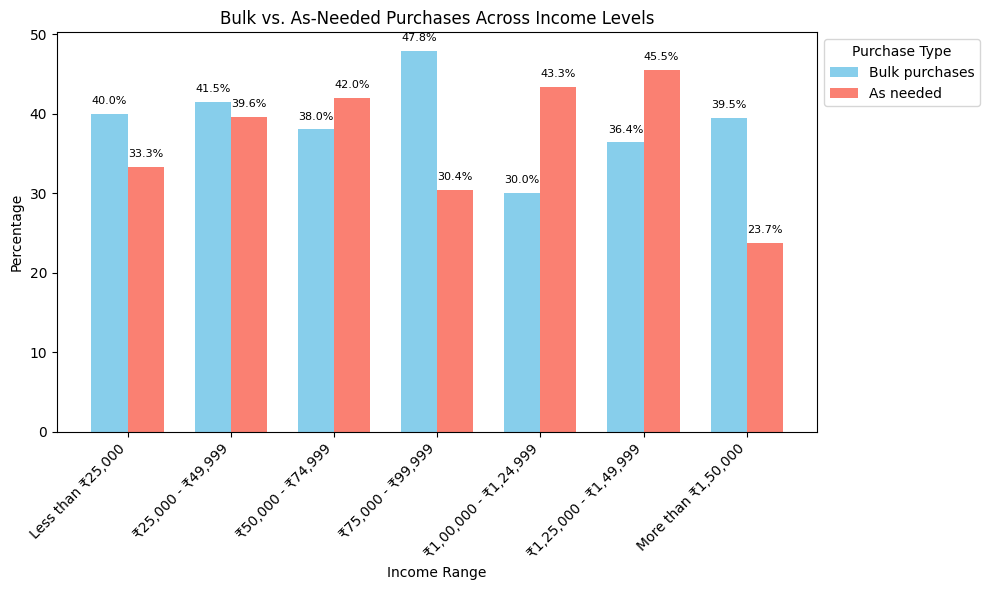

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is loaded into 'df'
bulk_vs_needed = df.groupby(['Income_Range', 'Bulk_or_Need']).size().unstack()

# Sort Income_Range in ascending order based on logical income levels
income_order = [
    'Less than ‚Çπ25,000',
    '‚Çπ25,000 - ‚Çπ49,999',
    '‚Çπ50,000 - ‚Çπ74,999',
    '‚Çπ75,000 - ‚Çπ99,999',
    '‚Çπ1,00,000 - ‚Çπ1,24,999',
    '‚Çπ1,25,000 - ‚Çπ1,49,999',
    'More than ‚Çπ1,50,000'
]
bulk_vs_needed = bulk_vs_needed.reindex(income_order)

# Calculate percentages for each income range
bulk_vs_needed_percentage = bulk_vs_needed.div(bulk_vs_needed.sum(axis=1), axis=0) * 100

# Create the clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35  # Width of the bars
x = np.arange(len(bulk_vs_needed_percentage.index))  # X-axis positions

# Plot the bars for percentages
ax.bar(x - bar_width / 2, bulk_vs_needed_percentage['Bulk purchases'], width=bar_width, label='Bulk purchases', color='skyblue')
ax.bar(x + bar_width / 2, bulk_vs_needed_percentage['As needed'], width=bar_width, label='As needed', color='salmon')

# Add percentage annotations
for i, value in enumerate(bulk_vs_needed_percentage['Bulk purchases']):
    ax.text(i - bar_width / 2, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=8, color='black')
for i, value in enumerate(bulk_vs_needed_percentage['As needed']):
    ax.text(i + bar_width / 2, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=8, color='black')

# Customize the plot
ax.set_title('Bulk vs. As-Needed Purchases Across Income Levels')
ax.set_xlabel('Income Range')
ax.set_ylabel('Percentage')
ax.set_xticks(x)
ax.set_xticklabels(bulk_vs_needed_percentage.index, rotation=45, ha='right')
ax.legend(title='Purchase Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [78]:
import pandas as pd

# Assuming your dataset is loaded into 'df'

# Group by Shopping Frequency and calculate the average of Avg_Spend_Monthly
shopping_spend = df.groupby('Shopping_Frequency')['Monthly_Spend'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame for better formatting
shopping_spend_df = shopping_spend.reset_index()
shopping_spend_df.columns = ['Shopping Frequency', 'Avg. Monthly Spend']

# Style the table to highlight values in decreasing order
styled_table = shopping_spend_df.style.background_gradient(cmap='Reds')

# Display the styled table
print("Shopping Frequency vs. Avg. Monthly Spend Table")
styled_table


Shopping Frequency vs. Avg. Monthly Spend Table


In [79]:
import pandas as pd

# Assuming your dataset is loaded into 'df'

# Group by Quantity_Per_Trip and calculate the average of Avg_Spend_Per_Visit
quantity_spend = df.groupby('Quantity_Per_Trip')['Spend_Per_Visit'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame for better formatting
quantity_spend_df = quantity_spend.reset_index()
quantity_spend_df.columns = ['Quantity Per Trip', 'Avg. Spend Per Visit']

# Style the table to highlight values in decreasing order
styled_table = quantity_spend_df.style.background_gradient(cmap='Greens')

# Display the styled table
print("Quantity Per Trip vs. Avg. Spend Per Visit Table")
styled_table


Quantity Per Trip vs. Avg. Spend Per Visit Table


In [80]:
import pandas as pd

# Assuming your dataset is loaded into 'df'

# Group by Time_Spent_Per_Visit and calculate the average of Avg_Spend_Per_Visit
time_spend = df.groupby('Time_Spent_Per_Visit')['Spend_Per_Visit'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame for better formatting
time_spend_df = time_spend.reset_index()
time_spend_df.columns = ['Time Spent Per Visit', 'Avg. Spend Per Visit']

# Style the table to highlight values in decreasing order
styled_table = time_spend_df.style.background_gradient(cmap='Blues')

# Display the styled table
print("Time Spent Per Visit vs. Avg. Spend Per Visit Table")
styled_table

Time Spent Per Visit vs. Avg. Spend Per Visit Table


## Payment and Discount 

In [81]:
import plotly.graph_objects as go

# Data preparation
payment_mode_counts = df['Payment_Mode'].value_counts()
total = payment_mode_counts.sum()
payment_mode_percentages = (payment_mode_counts / total * 100).round(1)

# Combine data for the table
data = {
    'Payment Mode': payment_mode_counts.index,
    'Count': payment_mode_counts.values,
    'Percentage (%)': payment_mode_percentages.values
}

# Create the table with black lines
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Payment Mode</b>', '<b>Count</b>', '<b>Percentage (%)</b>'],
                fill_color='lightblue',
                align='center',
                font=dict(color='black', size=12),
                line_color='black'),  # Adds black lines to the header
    cells=dict(values=[data['Payment Mode'], data['Count'], data['Percentage (%)']],
               fill_color='white',
               align='center',
               font=dict(color='black', size=10),
               line_color='black')  # Adds black lines to the cells
)])

# Update layout
fig.update_layout(title="Payment Mode Overview", title_x=0.5)

# Show the chart
fig.show()

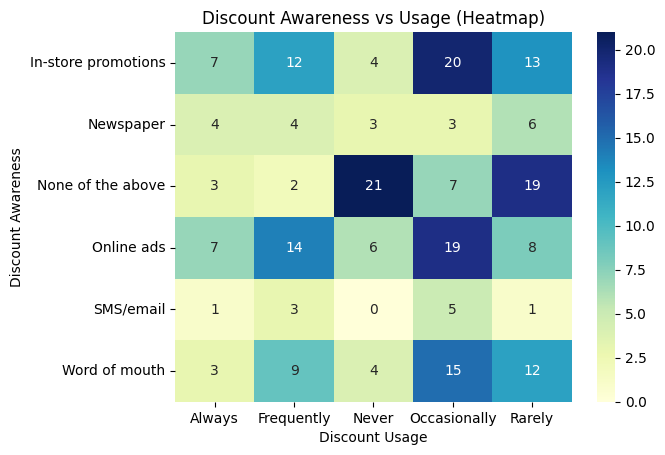

In [82]:
# Ensure all combinations are included using crosstab
discount_data = pd.crosstab(df['Discount_Awareness'], df['Discount_Usage'])

# Heatmap with missing values filled as 0
sns.heatmap(discount_data, annot=True, fmt='g', cmap='YlGnBu')  # 'g' ensures integer formatting
plt.title('Discount Awareness vs Usage (Heatmap)')
plt.xlabel('Discount Usage')
plt.ylabel('Discount Awareness')
plt.show()

In [83]:
import pandas as pd

# Assuming your dataset is loaded into 'df'

# Group by Discount Influence and calculate the average of Avg_Spend_Per_Visit
discount_influence = df.groupby('Discount_Influence')['Spend_Per_Visit'].mean().sort_values(ascending=False)

# Convert the result into a DataFrame for better formatting
discount_influence_df = discount_influence.reset_index()
discount_influence_df.columns = ['Discount Influence', 'Avg. Spend Per Visit']

# Style the table to highlight values in decreasing order
styled_table = discount_influence_df.style.background_gradient(cmap='Blues')

# Display the styled table
print("Discount Influence vs. Avg. Spend Per Visit Table")
styled_table

Discount Influence vs. Avg. Spend Per Visit Table


## Customer Loyalty & Ratings

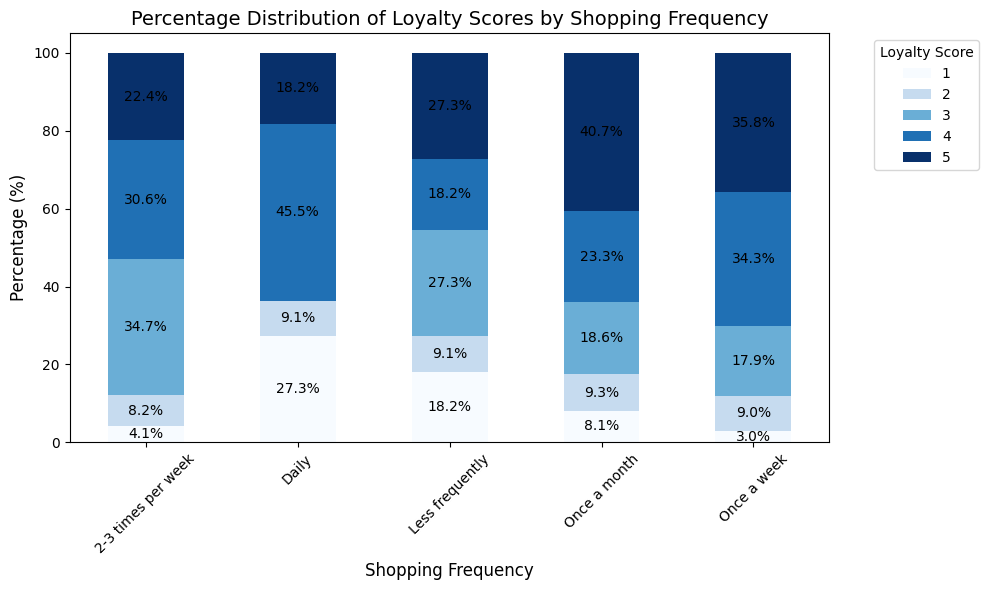

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called 'df'

# Create a crosstab for Shopping Frequency and Loyalty Score
data = pd.crosstab(df['Shopping_Frequency'], df['Loyalty_Score'], normalize='index') * 100  # Normalize by row to get percentages

# Plot the stacked bar chart
ax = data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')

# Add annotations to each bar segment
for container in ax.containers:
    for bar in container:
        height = bar.get_height()  # Get the height of the bar
        if height > 0:  # Annotate only non-zero values
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X-coordinate
                bar.get_y() + height / 2,  # Y-coordinate
                f"{height:.1f}%",  # Text to display
                ha='center', va='center', fontsize=10, color='black'
            )

# Add labels and title
plt.title('Percentage Distribution of Loyalty Scores by Shopping Frequency', fontsize=14)
plt.xlabel('Shopping Frequency', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Loyalty Score', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side for clarity
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

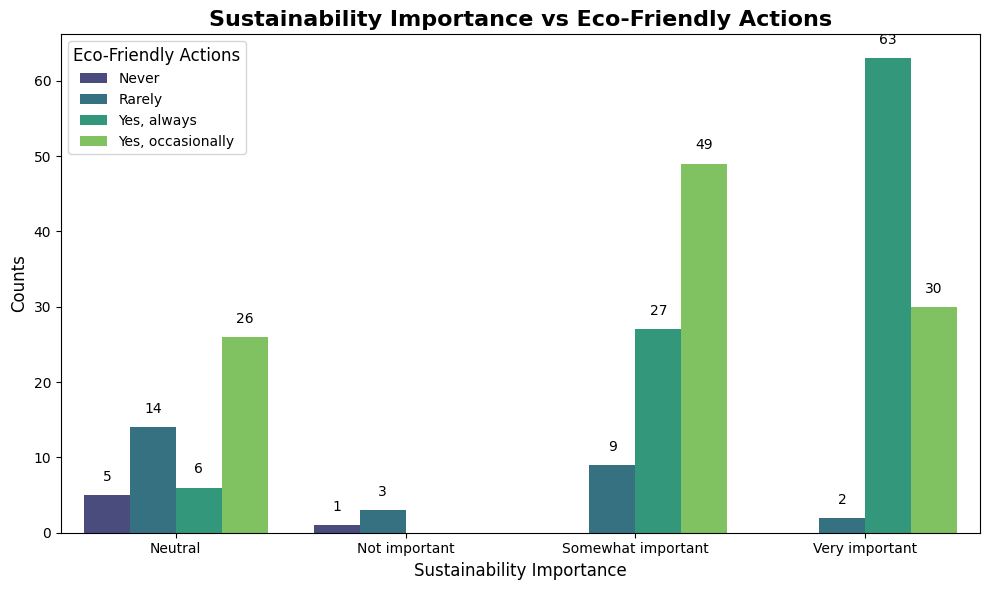

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is already loaded in df
# Grouping the data for better visualization
grouped_data = df.groupby(['Sustainability_Importance', 'Eco_Friendly_Actions']).size().reset_index(name='Counts')

# Setting up the plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=grouped_data,
    x='Sustainability_Importance',
    y='Counts',
    hue='Eco_Friendly_Actions',
    palette='viridis'
)

# Adding annotations with adjusted positioning and skipping zeros
for p in barplot.patches:
    value = p.get_height()  # Get the height of each bar
    if value > 0:  # Only annotate if value is greater than 0
        barplot.annotate(
            format(value, '.0f'),  # Format the count as an integer
            (p.get_x() + p.get_width() / 2., value),  # Center annotation above the bar
            ha='center', va='bottom', fontsize=10, color='black', 
            xytext=(0, 8), textcoords='offset points'  # Offset text vertically above the bar
        )

# Customizing the plot
plt.title('Sustainability Importance vs Eco-Friendly Actions', fontsize=16, fontweight='bold')
plt.xlabel('Sustainability Importance', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Eco-Friendly Actions', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1200x700 with 0 Axes>

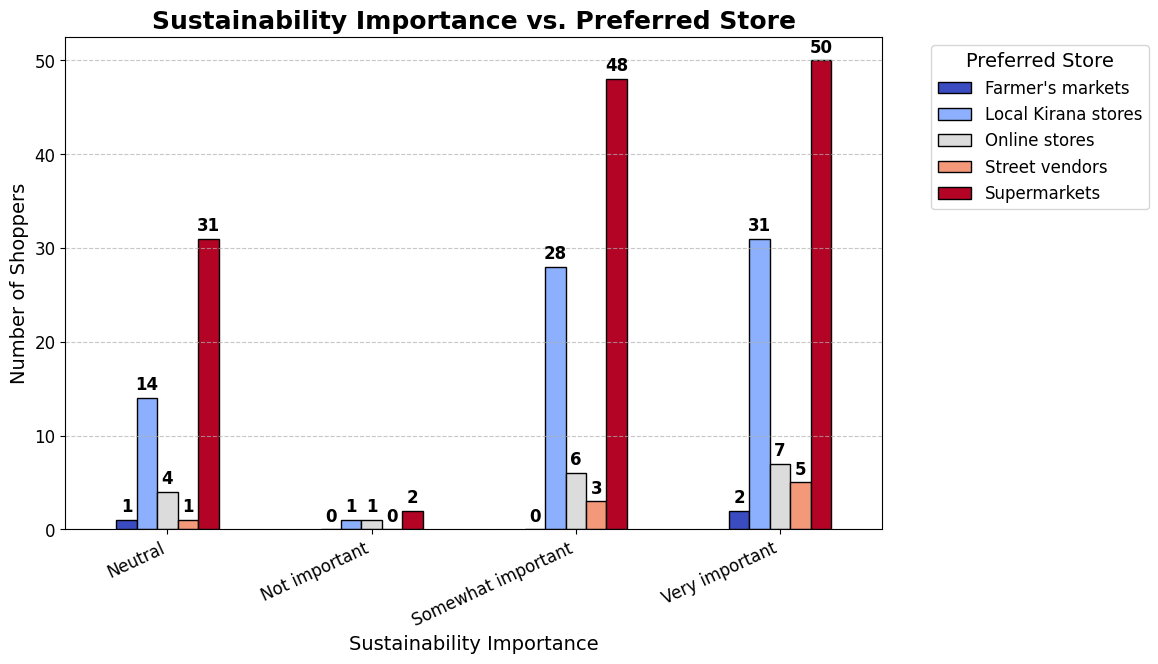

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by Sustainability Importance and Preferred Store
sustainability_vs_store = df.groupby(["Sustainability_Importance", "Preferred_Store"]).size().unstack()

# Increase figure size for a larger outer boundary
plt.figure(figsize=(12, 7))  # Slightly bigger to create more space

# Plotting grouped bar chart
ax = sustainability_vs_store.plot(
    kind='bar', 
    colormap='coolwarm', 
    edgecolor='black', 
    width=0.5,  # Slightly narrower bars for spacing
    figsize=(12, 7)  # Updated sizing
)

# Title and axis labels
plt.title('Sustainability Importance vs. Preferred Store', fontsize=18, fontweight='bold')
plt.xlabel('Sustainability Importance', fontsize=14)
plt.ylabel('Number of Shoppers', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=25, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3, color='black', fontweight='bold')

# Adjust legend position
plt.legend(
    title='Preferred Store',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
    title_fontsize=14
)

# Increase padding around the plot to make outer square bigger
plt.tight_layout(pad=2)  # This increases spacing outside the plot

plt.show()

  ### Popular Grocery Platforms

In [91]:
# List of platform columns (binary 0/1)
platform_columns = [
    'BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart',
    'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms'
]

# Melt binary columns into long format
df_melted = df.melt(
    id_vars=['Age'], 
    value_vars=platform_columns,
    var_name='Platform', 
    value_name='Used'
)

# Filter only rows where platform was used (Used == 1)
df_used = df_melted[df_melted['Used'] == 1]

In [92]:
df_melted

Age                Platform  Used
0      21               BigBasket     0
1      21               BigBasket     0
2      22               BigBasket     0
3      21               BigBasket     0
4      22               BigBasket     0
5      19               BigBasket     0
6      22               BigBasket     0
7      25               BigBasket     0
8      23               BigBasket     0
9      22               BigBasket     1
10     22               BigBasket     0
11     21               BigBasket     0
12     23               BigBasket     0
13     38               BigBasket     0
14     37               BigBasket     0
15     22               BigBasket     0
16     22               BigBasket     0
17     22               BigBasket     0
18     40               BigBasket     0
19     22               BigBasket     0
20     25               BigBasket     0
21     22               BigBasket     0
22     24               BigBasket     0
23     22               BigBasket     0
24     35               BigBasket     0
25     21               BigBasket     0
26     36               BigBasket     0
27     25               BigBasket     0
28     18               BigBasket     0
29     21               BigBasket     0
30     24               BigBasket     1
31     20               BigBasket     0
32     22               BigBasket     0
33     44               BigBasket     0
34     22               BigBasket     0
35     22               BigBasket     0
36     22               BigBasket     1
37     22               BigBasket     1
38     22               BigBasket     0
39     54               BigBasket     0
40     44               BigBasket     0
41     23               BigBasket     1
42     26               BigBasket     1
43     21               BigBasket     0
44     22               BigBasket     0
45     65               BigBasket     1
46     22               BigBasket     1
47     45               BigBasket     0
48     22               BigBasket     0
49     25               BigBasket     0
50     22               BigBasket     1
51     22               BigBasket     0
52     22               BigBasket     0
53     39               BigBasket     0
54     22               BigBasket     0
55     47               BigBasket     0
56     24               BigBasket     0
57     21               BigBasket     0
58     23               BigBasket     0
59     55               BigBasket     0
60     25               BigBasket     0
61     16               BigBasket     0
62     25               BigBasket     0
63     21               BigBasket     0
64     35               BigBasket     0
65     46               BigBasket     0
66     22               BigBasket     0
67     22               BigBasket     0
68     28               BigBasket     0
69     23               BigBasket     0
70     22               BigBasket     0
71     25               BigBasket     0
72     19               BigBasket     0
73     24               BigBasket     0
74     22               BigBasket     0
75     21               BigBasket     1
76     23               BigBasket     1
77     20               BigBasket     0
78     33               BigBasket     0
79     33               BigBasket     1
80     17               BigBasket     0
81     22               BigBasket     0
82     39               BigBasket     0
83     22               BigBasket     0
84     22               BigBasket     1
85     22               BigBasket     0
86     22               BigBasket     0
87     22               BigBasket     0
88     23               BigBasket     0
89     21               BigBasket     1
90     22               BigBasket     0
91     24               BigBasket     0
92     20               BigBasket     0
93     35               BigBasket     0
94     23               BigBasket     0
95     40               BigBasket     1
96     19               BigBasket     0
97     18               BigBasket     1
98     35               BigBasket     0
99    

In [93]:
df_used.info

<bound method DataFrame.info of       Age                Platform  Used
9      22               BigBasket     1
30     24               BigBasket     1
36     22               BigBasket     1
37     22               BigBasket     1
41     23               BigBasket     1
42     26               BigBasket     1
45     65               BigBasket     1
46     22               BigBasket     1
50     22               BigBasket     1
75     21               BigBasket     1
76     23               BigBasket     1
79     33               BigBasket     1
84     22               BigBasket     1
89     21               BigBasket     1
95     40               BigBasket     1
97     18               BigBasket     1
99     44               BigBasket     1
109    20               BigBasket     1
115    18               BigBasket     1
119    56               BigBasket     1
124    35               BigBasket     1
125    35               BigBasket     1
131    22               BigBasket     1
132    5

In [94]:
df['Age'].count

<bound method Series.count of 0      21
1      21
2      22
3      21
4      22
5      19
6      22
7      25
8      23
9      22
10     22
11     21
12     23
13     38
14     37
15     22
16     22
17     22
18     40
19     22
20     25
21     22
22     24
23     22
24     35
25     21
26     36
27     25
28     18
29     21
30     24
31     20
32     22
33     44
34     22
35     22
36     22
37     22
38     22
39     54
40     44
41     23
42     26
43     21
44     22
45     65
46     22
47     45
48     22
49     25
50     22
51     22
52     22
53     39
54     22
55     47
56     24
57     21
58     23
59     55
60     25
61     16
62     25
63     21
64     35
65     46
66     22
67     22
68     28
69     23
70     22
71     25
72     19
73     24
74     22
75     21
76     23
77     20
78     33
79     33
80     17
81     22
82     39
83     22
84     22
85     22
86     22
87     22
88     23
89     21
90     22
91     24
92     20
93     35
94     23
95     40
96     19


In [95]:
df_melted.sample(5)

Age      Platform  Used
97     18     BigBasket     1
1185   22  Amazon Fresh     0
1015   21       JioMart     0
1373   59  Amazon Fresh     0
1618   22      Flipkart     0

In [96]:
df_used.sample(5)

Age      Platform  Used
1402   58  Amazon Fresh     1
825    32         Zepto     1
951    21       JioMart     1
1061   34       JioMart     1
9      22     BigBasket     1

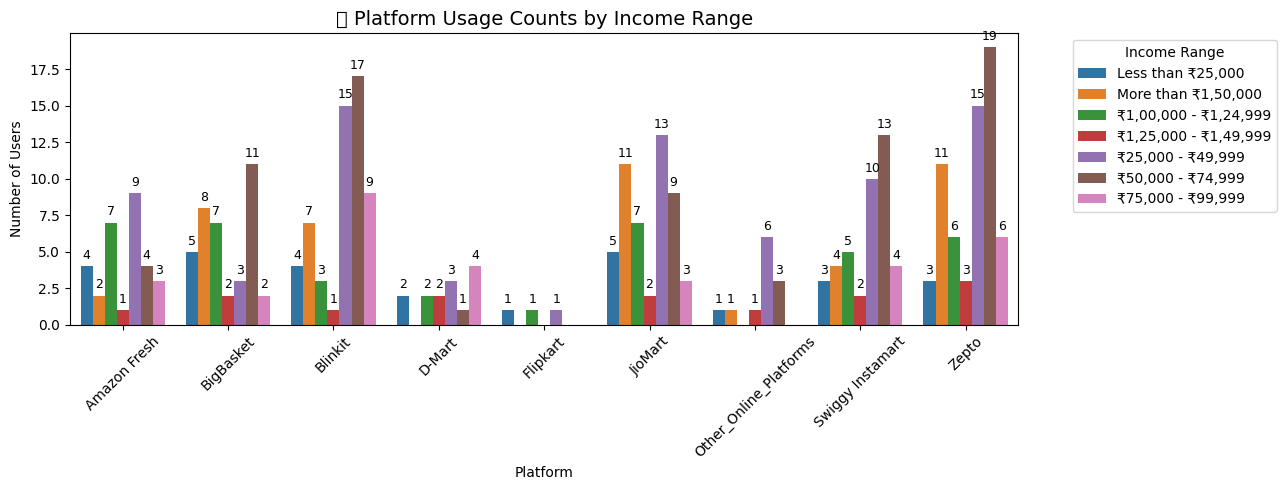

In [97]:
# Melt and count
income_melted = df.melt(id_vars='Income_Range', value_vars=platform_cols,
                        var_name='Platform', value_name='Used')
income_melted['Used'] = income_melted['Used'].astype(int)
income_counts = income_melted[income_melted['Used'] == 1] \
    .groupby(['Income_Range', 'Platform'])['Used'] \
    .count().reset_index()

# Plot
plt.figure(figsize=(13, 5))
ax = sns.barplot(data=income_counts, x='Platform', y='Used', hue='Income_Range')

# Annotate counts
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.title("üí∞ Platform Usage Counts by Income Range", fontsize=14)
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title="Income Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

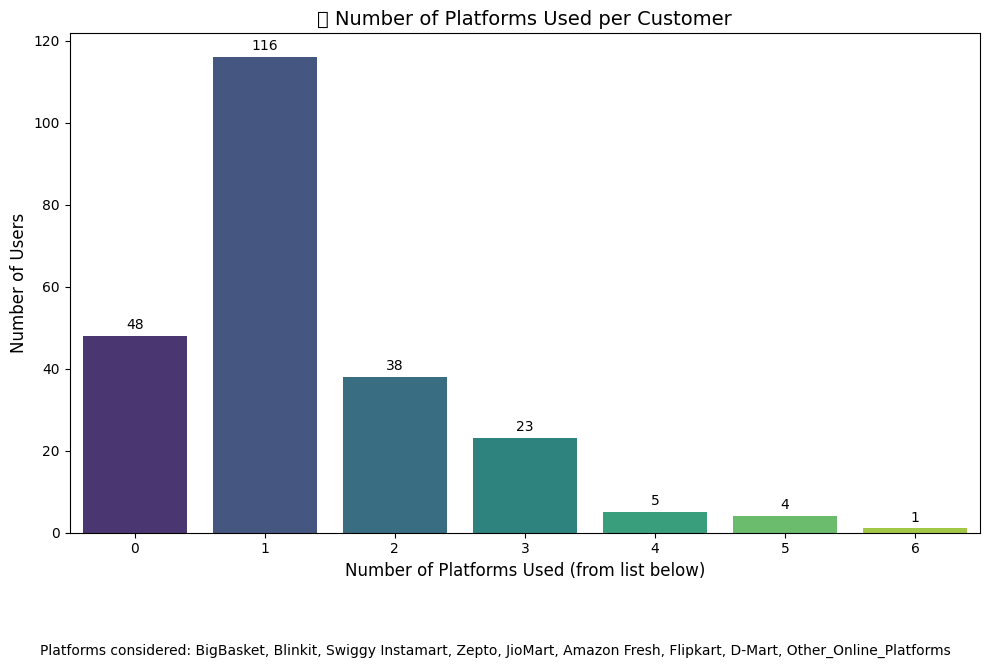

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate how many platforms each customer uses
platform_cols = [
    'BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart',
    'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms'
]

df['Total_Platforms_Used'] = df[platform_cols].sum(axis=1)

# Step 2: Count how many users use 0, 1, 2... platforms
platform_usage_counts = df['Total_Platforms_Used'].value_counts().sort_index()

# Step 3: Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=platform_usage_counts.index, y=platform_usage_counts.values, palette="viridis")

# Add count annotations
for i, bar in enumerate(bars.patches):  # Access individual bars
    height = bar.get_height()
    bars.annotate(f'{int(height)}',  # Display counts as integers
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5), textcoords='offset points',
                  ha='center', fontsize=10)

# Step 4: Formatting
plt.title("üõí Number of Platforms Used per Customer", fontsize=14)
plt.xlabel("Number of Platforms Used (from list below)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add platform list as text
platform_list = ', '.join(platform_cols)
plt.figtext(0.5, -0.1, f"Platforms considered: {platform_list}", wrap=True, ha='center', fontsize=10)

plt.tight_layout()
plt.show()

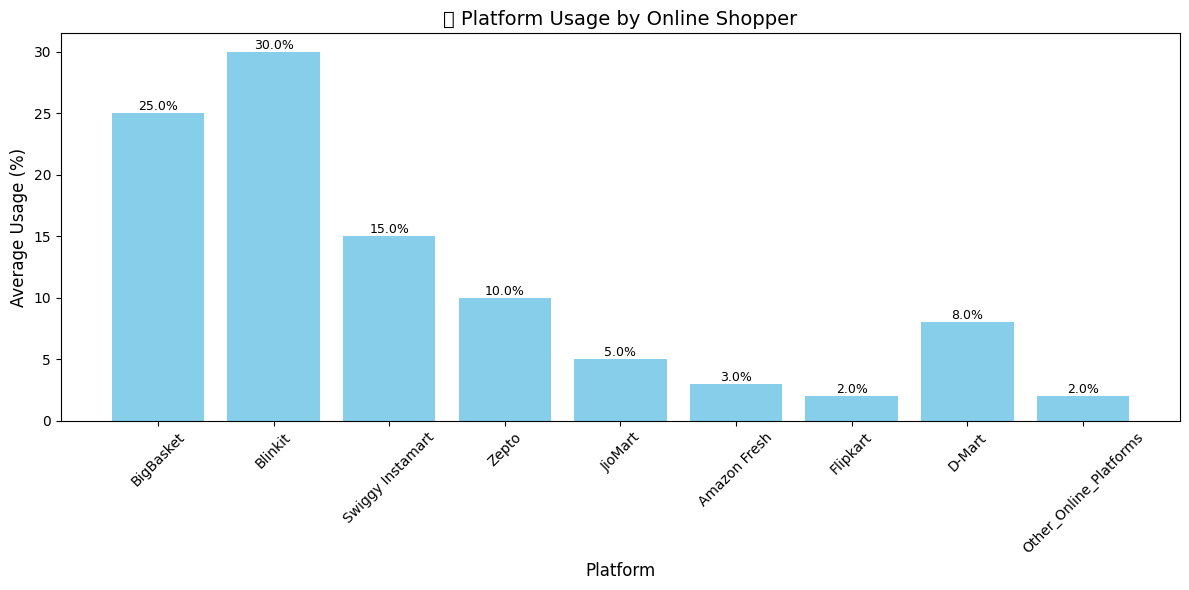

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# List of grocery platforms and their average usage (replace with your actual data)
platforms = ['BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart', 
             'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms']
usage_percentages = [0.25, 0.30, 0.15, 0.10, 0.05, 0.03, 0.02, 0.08, 0.02]  # Example data

# Convert percentages to decimal for annotation
usage_percentages = [x * 100 for x in usage_percentages]

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(platforms, usage_percentages, color='skyblue')

# Annotate bars with percentage values
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=9, color='black')

# Add labels and title
plt.title('üõí Platform Usage by Online Shopper', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Usage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

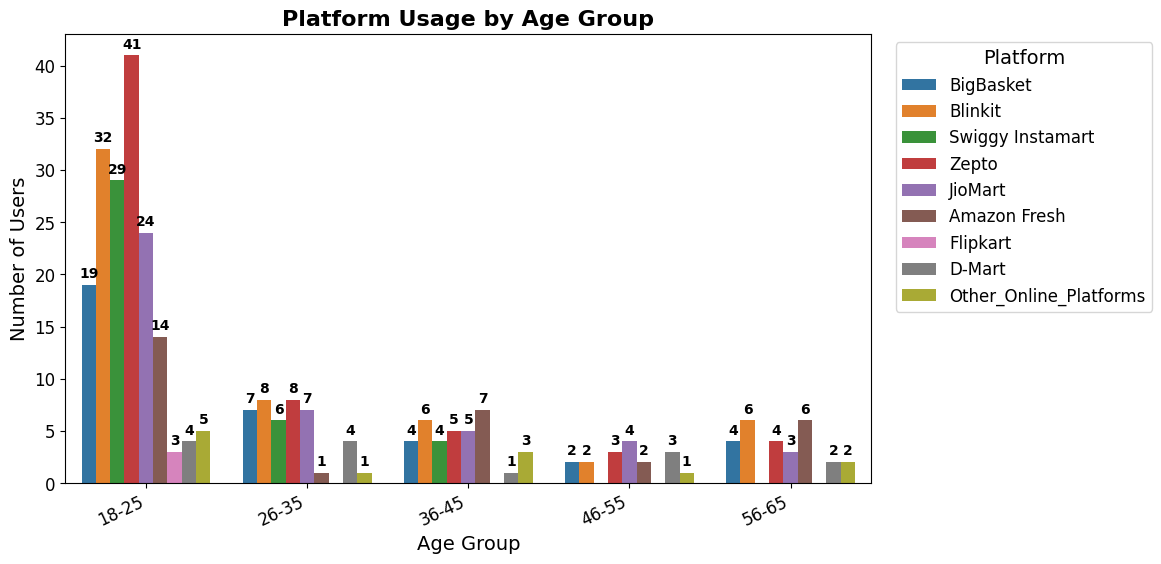

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of platform columns (binary 0/1)
platform_columns = [
    'BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart',
    'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms'
]

# Melt binary columns into long format
df_melted = df.melt(
    id_vars=['Age'], 
    value_vars=platform_columns,
    var_name='Platform', 
    value_name='Used'
)

# Filter only rows where platform was used (Used == 1)
df_used = df_melted[df_melted['Used'] == 1]

# Create age bins
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df_used['Age_Group'] = pd.cut(df_used['Age'], bins=bins, labels=labels)

df_PLOTT = df_used[df_used['Age_Group'] != '65+']

# Adjust figure size and make the plot
plt.figure(figsize=(12, 6))  # Adjusted figure size for better layout
ax = sns.countplot(data=df_PLOTT, x='Age_Group', hue='Platform', dodge=True)

# Set the title and labels
plt.title('Platform Usage by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=25, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Move the legend outside the plot
plt.legend(
    title='Platform',
    bbox_to_anchor=(1.02, 1),  # Position legend outside the plot
    loc='upper left',
    fontsize=12,
    title_fontsize=14
)

# Add annotations on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3, color='black', fontweight='bold')

# Add padding for the outer layout
plt.tight_layout(pad=2)  # Increase padding for the entire layout

# Show the plot
plt.show()

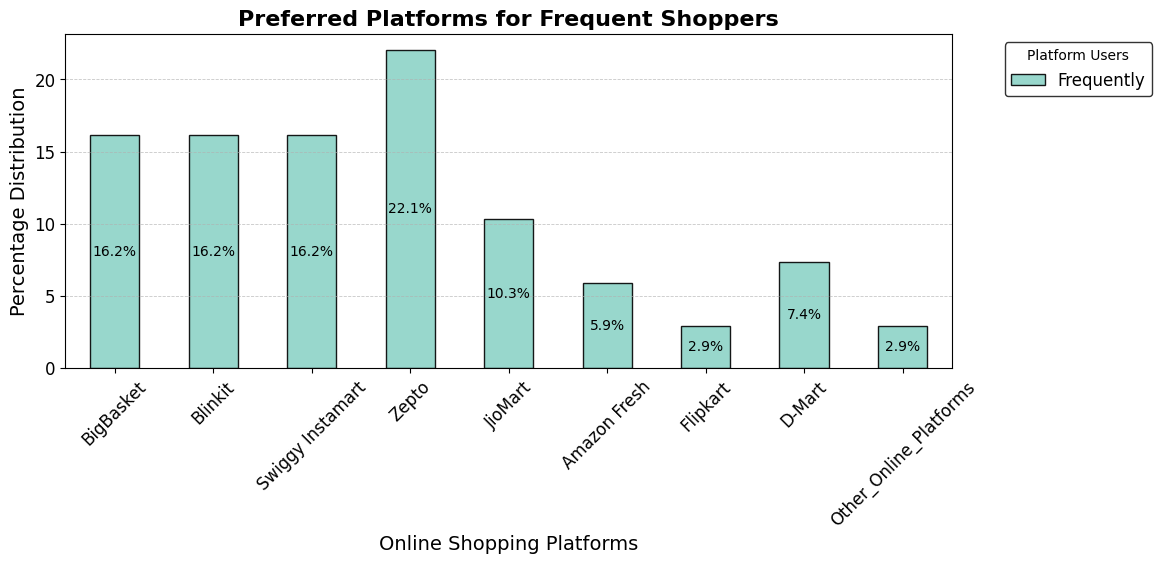

In [101]:
# Define the list of platforms
platforms = [
    'BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart',
    'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms'
]

# Filter out 'Never' and focus on 'Frequently' shoppers
frequent_shoppers_df = df[df['Online_Shopping_Frequency'] == 'Frequently']

# Grouping data for frequent shoppers
platform_usage = frequent_shoppers_df.groupby('Online_Shopping_Frequency')[platforms].sum()
platform_usage_percent = platform_usage.div(platform_usage.sum(axis=1), axis=0) * 100

# Define vibrant colors for platforms
colors = sns.color_palette("Set3", len(platforms))

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = platform_usage_percent.T.plot(kind='bar', stacked=True, color=colors, edgecolor='black', alpha=0.9, ax=ax)

# Adding title and labels
plt.title('Preferred Platforms for Frequent Shoppers', fontsize=16, fontweight='bold')
plt.xlabel('Online Shopping Platforms', fontsize=14)
plt.ylabel('Percentage Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend position
ax.legend(
    title="Platform Users",
    bbox_to_anchor=(1.05, 1),  # Position legend outside the plot
    loc='upper left',
    fontsize=12,
    edgecolor='black'
)

# Add percentage annotations on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            plt.annotate(f'{height:.1f}%',
                         (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                         ha='center', va='center', fontsize=10, color='black')

# Add gridlines for clarity
ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7)

# Adjust layout
plt.tight_layout(pad=2)

# Show the plot
plt.show()

### Service-Related Factors

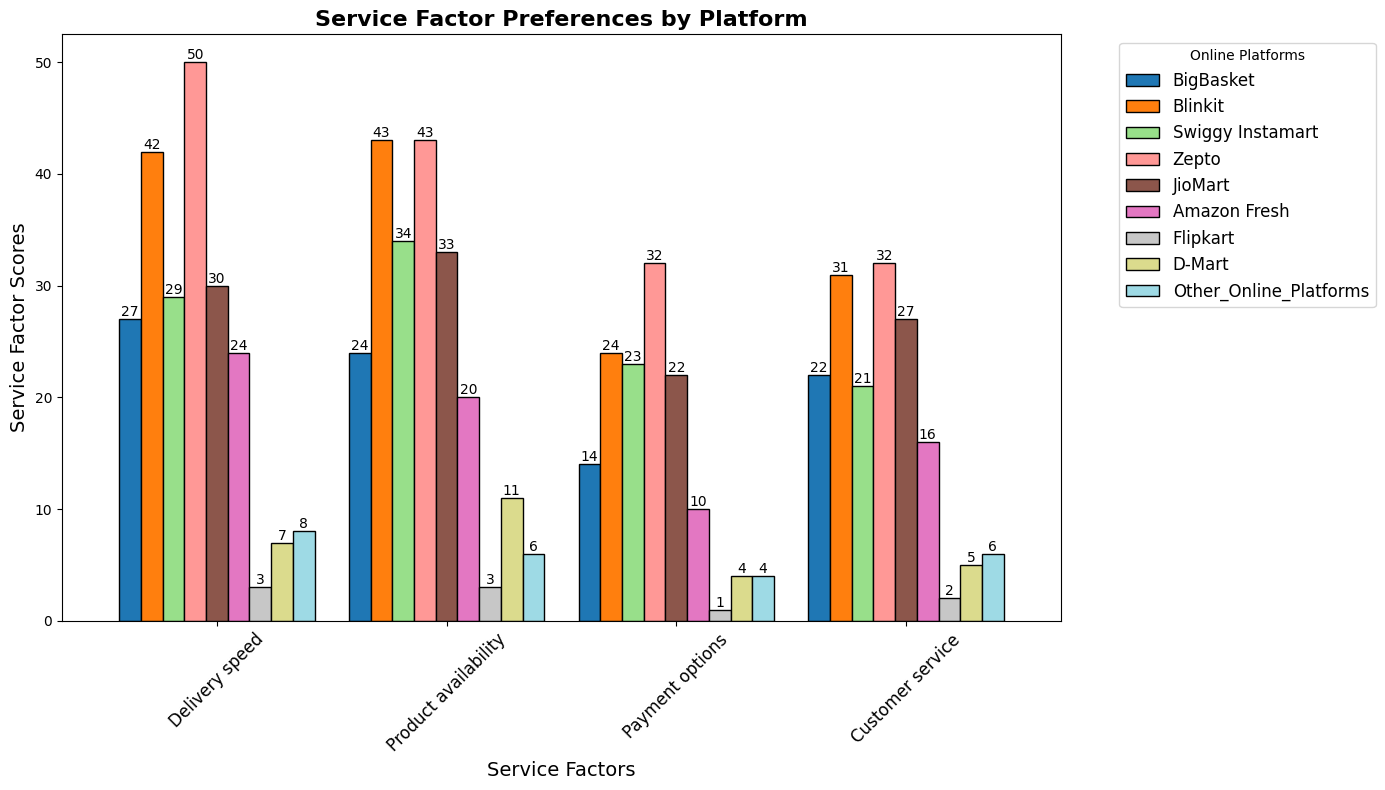

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting online platforms and service factors
platforms = ['BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart', 
             'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms']
service_factors = ['Delivery speed', 'Product availability', 
                   'Payment options', 'Customer service']

# Calculating the sum of service factors for each platform
platform_service_scores = df[platforms].T.dot(df[service_factors])

# Transposing the DataFrame to make service factors on the x-axis
platform_service_scores_transposed = platform_service_scores.T

# Plotting the clustered bar chart with increased bar width
ax = platform_service_scores_transposed.plot(
    kind='bar', 
    figsize=(14, 8), 
    colormap='tab20', 
    edgecolor='black', 
    width=0.85  # Adjust the width of the bars
)

# Adding annotations to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

# Setting chart title and labels
plt.title('Service Factor Preferences by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Service Factors', fontsize=14)
plt.ylabel('Service Factor Scores', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Online Platforms', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

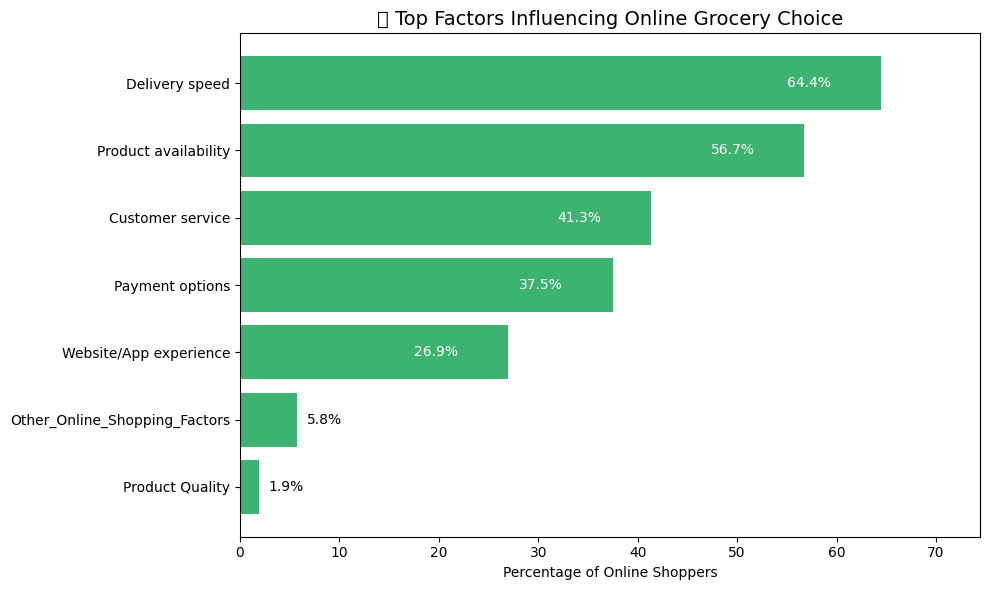

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter for online shoppers
online_df = df[df["Shopper\'s_Type"] == 'Online_Shopper']

# 2. Service-related factors
service_factors = [
    'Delivery speed', 'Product availability', 'Website/App experience',
    'Payment options', 'Customer service', 'Product Quality', 'Other_Online_Shopping_Factors'
]

# 3. Safeguard against missing or zero data
if len(online_df) == 0:
    print("No data found for Online shoppers. Check the input dataset.")
else:
    # Calculate the percentage of online shoppers selecting each factor
    factor_percent = online_df[service_factors].sum() / len(online_df) * 100
    factor_percent = factor_percent.sort_values(ascending=False)

    # Handle potential NaN or zero values
    factor_percent = factor_percent.dropna()  # Remove NaN values
    factor_percent = factor_percent[factor_percent > 0]  # Keep only positive values

    # 4. DataFrame for plotting
    factor_df = pd.DataFrame({'Factor': factor_percent.index, 'Percentage': factor_percent.values})

    # 5. Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(factor_df['Factor'], factor_df['Percentage'], color='mediumseagreen')

    # 6. Add annotations inside or just at the edge
    for bar in bars:
        width = bar.get_width()
        if width > 10:  # Put inside if bar is wide enough
            plt.text(width - 5, bar.get_y() + bar.get_height() / 2,
                     f'{width:.1f}%', va='center', ha='right', color='white', fontsize=10)
        else:  # Put just outside
            plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
                     f'{width:.1f}%', va='center', ha='left', color='black', fontsize=10)

    # Final touches for the plot
    plt.title("üì¶ Top Factors Influencing Online Grocery Choice", fontsize=14)
    plt.xlabel("Percentage of Online Shoppers")
    plt.xlim(0, factor_df['Percentage'].max() + 10)  # Add extra space for labels
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

### Cart Abandonment Reasons

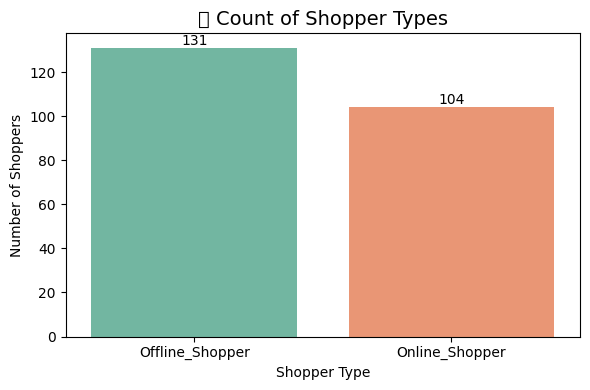

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Shopper\'s_Type", palette='Set2')

plt.title("üõçÔ∏è Count of Shopper Types", fontsize=14)
plt.xlabel("Shopper Type")
plt.ylabel("Number of Shoppers")

# Add annotations
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(f'{count}', 
                       (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

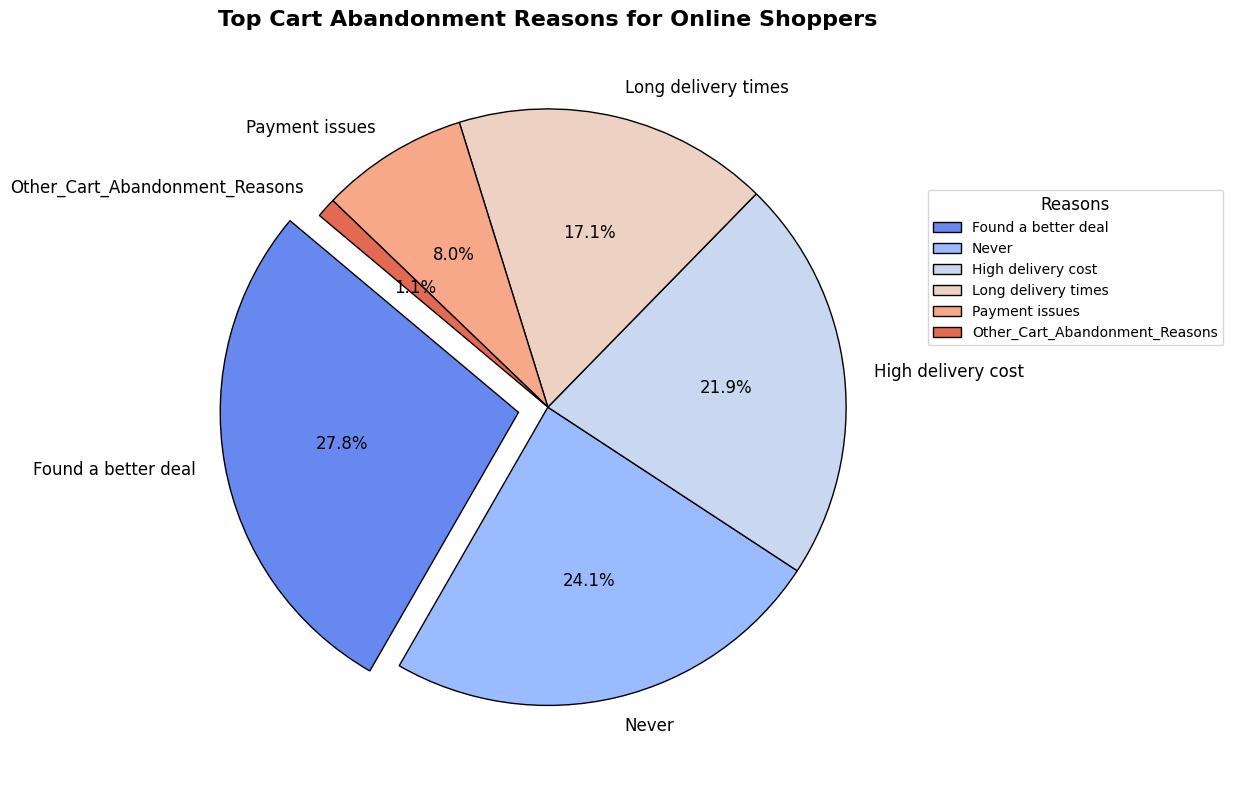

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data (as a dictionary example for demonstration)
cart_reason_counts = {
    'Found a better deal': 52,
    '[]': 48,
    'Never': 45,
    'High delivery cost': 41,
    'Long delivery times': 32,
    'Payment issues': 15,
    'Other_Cart_Abandonment_Reasons': 2
}

# Convert to a pandas Series
cart_reason_counts = pd.Series(cart_reason_counts)

# Exclude null values (e.g., '[]')
cart_reason_counts = cart_reason_counts[cart_reason_counts.index != '[]']

# Plotting the pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('coolwarm', len(cart_reason_counts))
explode = [0.1 if reason == cart_reason_counts.max() else 0 for reason in cart_reason_counts.values]

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    cart_reason_counts,
    labels=cart_reason_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12}
)

# Add a legend for better understanding
plt.legend(
    wedges,
    cart_reason_counts.index,
    title="Reasons",
    loc="upper left",
    bbox_to_anchor=(1, 0.8),
    fontsize=10,
    title_fontsize=12
)

# Add an engaging title
plt.title('Top Cart Abandonment Reasons for Online Shoppers', fontsize=16, fontweight='bold')

# Adjust the layout to ensure nothing overlaps
plt.tight_layout()
plt.show()

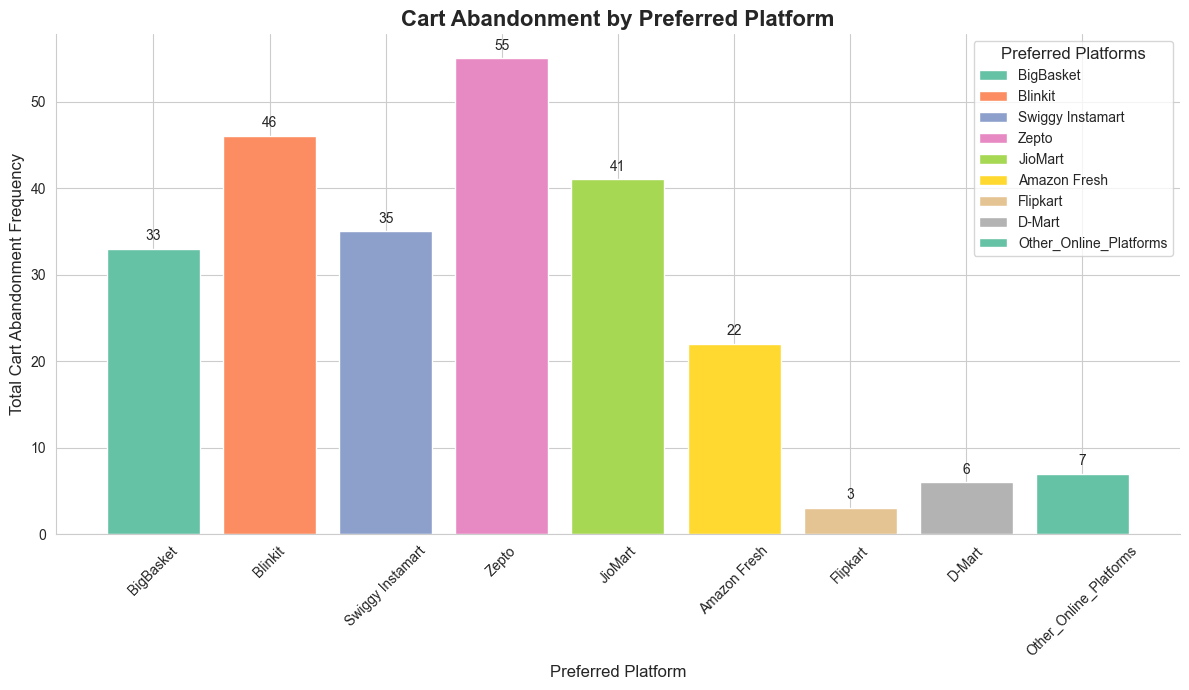

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define relevant columns for preferred platforms and cart abandonment
platform_columns = [
    'BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto',
    'JioMart', 'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms'
]
cart_abandonment_columns = [
    'High delivery cost', 'Long delivery times', 'Found a better deal',
    'Payment issues', 'Other_Cart_Abandonment_Reasons'
]

# Calculate total cart abandonment for each platform
platform_abandonment = df[platform_columns].T.dot(df[cart_abandonment_columns].sum(axis=1))

# Set Seaborn style and color palette for aesthetics
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(platform_columns))

# Plot bars manually to include labels for the legend
fig, ax = plt.subplots(figsize=(12, 7))
bars = []
for platform, color in zip(platform_abandonment.index, palette):
    bar = ax.bar(platform, platform_abandonment[platform], color=color, label=platform)
    bars.append(bar)

# Add legend with all platforms
ax.legend(title="Preferred Platforms", fontsize=10, title_fontsize=12)

# Customize chart aesthetics
ax.set_title("Cart Abandonment by Preferred Platform", fontsize=16, fontweight="bold")
ax.set_ylabel("Total Cart Abandonment Frequency", fontsize=12)
ax.set_xlabel("Preferred Platform", fontsize=12)
ax.tick_params(axis='x', labelrotation=45)

# Add count annotations
for bar in bars:
    for b in bar:
        ax.text(b.get_x() + b.get_width() / 2, b.get_height() + 1,
                f'{int(b.get_height())}', ha='center', fontsize=10)

# Remove unnecessary spines for a clean look
sns.despine()
plt.tight_layout()
plt.show()


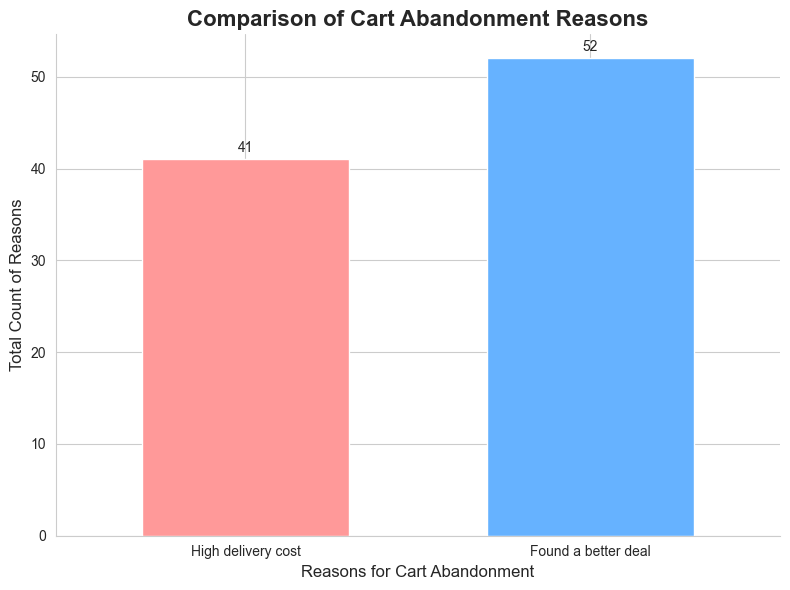

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total count for each reason
abandonment_totals = df[['High delivery cost', 'Found a better deal']].sum()

# Set Seaborn style for aesthetics
sns.set_style("whitegrid")
colors = ['#FF9999', '#66B2FF']  # Custom colors for the bars

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
abandonment_totals.plot(kind='bar', color=colors, ax=ax, width=0.6)

# Customize chart aesthetics
ax.set_title("Comparison of Cart Abandonment Reasons", fontsize=16, fontweight="bold")
ax.set_ylabel("Total Count of Reasons", fontsize=12)
ax.set_xlabel("Reasons for Cart Abandonment", fontsize=12)
ax.tick_params(axis='x', labelrotation=0)
ax.bar_label(ax.containers[0], fontsize=10, padding=3)  # Add count annotations

# Remove unnecessary spines for a clean look
sns.despine()
plt.tight_layout()
plt.show()